In [2]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
from lxml import html
import selenium
from selenium import webdriver
import time
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import StaleElementReferenceException

IMPORTED THE NECESSARY LIBRARIES FOR WEB SCRAPING.

# ANSWER TO QUESTION 1 and 2 OF WEB SCRAPING ASSIGNMENT 3:-

In [149]:
driver = webdriver.Chrome('chromedriver.exe')

In [150]:
url = 'https://www.amazon.in/'
driver.get(url)
time.sleep(5)

In [151]:
#entering 'guitars' in the search field in amazon.in website and clicking the search button--
driver.find_element_by_xpath('//input[@id="twotabsearchtextbox"]').click()
time.sleep(2)
driver.find_element_by_xpath('//input[@id="twotabsearchtextbox"]').send_keys('guitars')
time.sleep(2)
driver.find_element_by_xpath('//input[@id="nav-search-submit-button"]').click()
time.sleep(2)

In [152]:
#searching for urls for first 3 pages for guitars--
urls=[]

product_urls=driver.find_elements_by_xpath("//h2[@class='a-size-mini a-spacing-none a-color-base s-line-clamp-4']/a")  
for i in product_urls:
    urls.append(i.get_attribute('href'))



urls    

['https://www.amazon.in/gp/slredirect/picassoRedirect.html/ref=pa_sp_atf_aps_sr_pg1_1?ie=UTF8&adId=A05211881ZGJIHX360ZMV&url=%2FKadence-Frontier-Acoustic-Guitar-Equalizer%2Fdp%2FB01HRIHJWY%2Fref%3Dsr_1_1_sspa%3Fdchild%3D1%26keywords%3Dguitars%26qid%3D1624284684%26sr%3D8-1-spons%26psc%3D1&qualifier=1624284684&id=6308674488641582&widgetName=sp_atf',
 'https://www.amazon.in/gp/slredirect/picassoRedirect.html/ref=pa_sp_atf_aps_sr_pg1_1?ie=UTF8&adId=A00103562TH7ZMEL1FOWU&url=%2FKadence-Slowhand-Premium-Acoustic-Instrument%2Fdp%2FB077SZ667X%2Fref%3Dsr_1_2_sspa%3Fdchild%3D1%26keywords%3Dguitars%26qid%3D1624284684%26sr%3D8-2-spons%26psc%3D1&qualifier=1624284684&id=6308674488641582&widgetName=sp_atf',
 'https://www.amazon.in/gp/slredirect/picassoRedirect.html/ref=pa_sp_atf_aps_sr_pg1_1?ie=UTF8&adId=A0928654VYD9HPIWAKBZ&url=%2FKadence-Frontier-Natural-Acoustic-Foldable%2Fdp%2FB01CJJGJ04%2Fref%3Dsr_1_3_sspa%3Fdchild%3D1%26keywords%3Dguitars%26qid%3D1624284684%26sr%3D8-3-spons%26psc%3D1&qualifier=

In [153]:
driver.find_element_by_xpath("//li[@class='a-last']/a").click()
time.sleep(3)

In [154]:
#getting url for each product and adding to a list of 'urls' variable--
product_urls=driver.find_elements_by_xpath("//h2[@class='a-size-mini a-spacing-none a-color-base s-line-clamp-4']/a")  
for i in product_urls:
    urls.append(i.get_attribute('href'))

In [155]:
len(urls)

109

In [156]:
driver.find_element_by_xpath("//li[@class='a-last']/a").click()
time.sleep(3)

In [157]:
product_urls=driver.find_elements_by_xpath("//h2[@class='a-size-mini a-spacing-none a-color-base s-line-clamp-4']/a")  
for i in product_urls:
    urls.append(i.get_attribute('href'))

In [158]:
len(urls)

157

In [164]:
Brand_Name=[]
Rating=[]
No_of_Ratings=[]
Price=[]
Return=[]
Expected_Delivery=[]
Availability=[]
Other_Details=[]


for ur in urls:

    driver.get(ur)

    time.sleep(2)

    try:

        name = driver.find_element_by_xpath("//span[@id='productTitle']")

        Brand_Name.append(name.text)

    except NoSuchElementException:

        Brand_Name.append("-")

    try:
        rating_tag=driver.find_element_by_xpath("//span[@data-hook='rating-out-of-text']")
        Rating.append(rating_tag.text)
    except NoSuchElementException:
        Rating.append('-')

    try:
        nr=driver.find_element_by_xpath("//div[@data-hook='total-review-count']/span")
        No_of_Ratings.append(nr.text)
    except NoSuchElementException:
        No_of_Ratings.append('-')
    
    
    try:
        price_l=driver.find_element_by_xpath("//span[@class='a-size-medium a-color-price priceBlockBuyingPriceString']")
        Price.append(price_l.text)
    except NoSuchElementException:
        Price.append('-')

    try:    

        re = driver.find_element_by_xpath("//div[@data-name='RETURNS_POLICY']/span/div[2]/a")

        Return.append(re.text)

    except NoSuchElementException:

        Return.append("-")
    
    try:
        ed=driver.find_element_by_xpath("//div[@id='ddmDeliveryMessage']")
        Expected_Delivery.append(ed.text)
    except NoSuchElementException:
        Expected_Delivery.append('-')
    
    try:
        avail=driver.find_element_by_xpath("//div[@data-cel-widget='availability_feature_div']")
        Availability.append(avail.text)
    except NoSuchElementException:
        Availability.append('-')
        
    try:
        ode=driver.find_element_by_xpath("//ul[@class='a-unordered-list a-vertical a-spacing-mini']")
        Other_Details.append(ode.text)
    except NoSuchElementException:
        Other_Details.append('-')
    
#creating a dataframe
pd.set_option('display.max_colwidth', None)
df=pd.DataFrame({'Brand_name':Brand_Name,'Rating':Rating,'Number_of_ratings':No_of_Ratings,
                'Price':Price,'Return/Exchange':Return,'Expected_Delivery':Expected_Delivery,
                'Availability':Availability,'Other_Details':Other_Details,'Product_url':urls})
#printing dataframe
df    
        
    


,Brand_name,Rating,Number_of_ratings,Price,Return/Exchange,Expected_Delivery,Availability,Other_Details,Product_url
0,"Kadence Frontier Jumbo Semi Acoustic Guitar With Die Cast Keys,Super Combo (Bag, 1 pack Strings, Strap, Picks, Capo, Tuner (black & stand)",4 out of 5,495 global ratings,-,7 Days Replacement,"FREE delivery: Saturday, June 26 Details",In stock.,"QUALITY STRINGS ---The surface is coated with a film coating, which is not easy to rust, which prolongs the use time of the strings and reduces the burden on the fingers when pressing the strings.\nDESIGN --- Simple head design, streamlined curvature makes the head and the body integrated, beautiful. The rosewood bridge has high hardness, strong vibration conductivity, stable and rich tone transmission.\nSIZE (41 inch)---Suitable for the guitarist over 14 years old, especially the beginners, students or adults.\nADJUSTABLE ACTION----Built-in truss rod can balanced the tension caused by strings or temperature change shrinking, for a straight and durable neck. The adjustable acoustic guitar neck allows your hand to stay in a comfortable position by keeping the strings in a perfect height.\nPackage Details:1 pack of Strings, picks, turner, foldable guitar stand, bag, strap and capo\nELECTRO-ACOUSTIC---Built-in preamp for amplified use with volume control, 4 band EQ: bass and treble, integrated tuner for fast and easy tuning.",https://www.amazon.in/gp/slredirect/picassoRedirect.html/ref=pa_sp_atf_aps_sr_pg1_1?ie=UTF8&adId=A05211881ZGJIHX360ZMV&url=%2FKadence-Frontier-Acoustic-Guitar-Equalizer%2Fdp%2FB01HRIHJWY%2Fref%3Dsr_1_1_sspa%3Fdchild%3D1%26keywords%3Dguitars%26qid%3D1624284684%26sr%3D8-1-spons%26psc%3D1&qualifier=1624284684&id=6308674488641582&widgetName=sp_atf
1,"Kadence Slowhand Premium Jumbo Semi Acoustic Guitar with Heavy Padded Bag, guitar cable, Pro Capo and Fibre guitar stand (Black Spruce Wood)",4.2 out of 5,149 global ratings,-,7 Days Replacement,"FREE delivery: Saturday, June 26 Details",In stock.,"QUALITY STRINGS ---The surface is coated with a film coating, which is not easy to rust, which prolongs the use time of the strings and reduces the burden on the fingers when pressing the strings.\nDESIGN --- The Deep Pore paint finish, Simple head design, streamlined curvature makes the head and the body integrated, beautiful. The rosewood bridge has high hardness, strong vibration conductivity, stable and rich tone transmission.\nSIZE (41 inch)---Suitable for the guitarist over 14 years old, especially the beginners, students or adults.\nADJUSTABLE ACTION----Built-in truss rod can balanced the tension caused by strings or temperature change shrinking, for a straight and durable neck. The adjustable acoustic guitar neck allows your hand to stay in a comfortable position by keeping the strings in a perfect height.\nWith Combo, Heavy Padded Bag, Pro Capo and Fiber Body Stand\nALL ACCESSORIES INCLUDED---Kadence Slowhand Guitar comes with zipped padded bag, in-built tunner, adjustable guitar strap, extra strings, 3 guitar picks, capo, foldable guitar stand and a Guitar cable.\nPROTECTIVE PADDED bag---Take your guitar with you to school or on trips with a stylish and protective carrying case, designed with foam pads, a shock-proof rubber bottom, and even a front storage for your capo and extra picks",https://www.amazon.in/gp/slredirect/picassoRedirect.html/ref=pa_sp_atf_aps_sr_pg1_1?ie=UTF8&adId=A00103562TH7ZMEL1FOWU&url=%2FKadence-Slowhand-Premium-Acoustic-Instrument%2Fdp%2FB077SZ667X%2Fref%3Dsr_1_2_sspa%3Fdchild%3D1%26keywords%3Dguitars%26qid%3D1624284684%26sr%3D8-2-spons%26psc%3D1&qualifier=1624284684&id=6308674488641582&widgetName=sp_atf
2,"Kadence Frontier Series, Natural Acoustic Guitar With Die Cast Keys Super Combo(Tuner,Capo,Bag,strap,strings and 3 picks)",3.8 out of 5,67 global ratings,-,7 Days Replacement,"FREE delivery: Saturday, June 26 Details",In stock.,"Product Type : Acoustic Guitar\nBrand:Kadence,Fretboard material:Rosewood,Number of strings:6\nType:A

## ANSWER TO QUESTION 3 OF WEB SCRAPING ASSIGNMENT 3:-

In [2]:
driver1 = webdriver.Chrome('chromedriver.exe')

In [4]:
url1 = 'https://images.google.com'
driver1.get(url1)
time.sleep(4)

In [5]:
#clicking the search bar--
driver1.find_element_by_xpath("//input[@class='gLFyf gsfi']").click()
#writing 'fruits' in the search bar--
driver1.find_element_by_xpath("//input[@class='gLFyf gsfi']").send_keys('fruits')
#clicking the search button--
driver1.find_element_by_xpath("//button[@class='Tg7LZd']").click()


,Fruits_Images
0,
1,
2,
3,
4,
...,...
95,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSc90AMVXwVYTH5dToPvu2EjHVPyjEFYNEWWQ&usqp=CAU
96,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRjbSklS1dIccuv8Jcf5B_Wopx9lVDLe4yzTQ&usqp=CAU
97,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ7kkivkhNYl7J-zrplcR4yzU2SWnbokp6Gxg&usqp=CAU
98,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTC38DbVEYrUbCEGrHX7tsGglGvttlEL6vpQQ&usqp=CAU

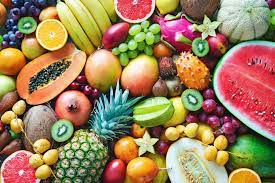
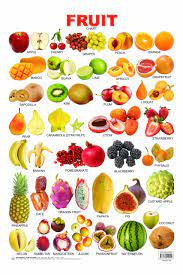
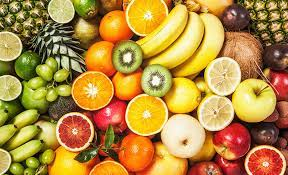
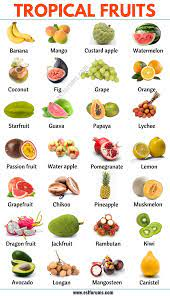
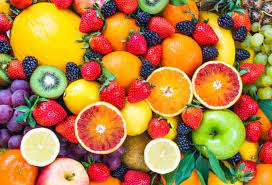

In [6]:
# getting the height of the page--
last_height = driver1.execute_script('return document.body.scrollHeight')

while True:
    driver1.execute_script('window.scrollTo(0,document.body.scrollHeight)')
    time.sleep(4)
    new_height = driver1.execute_script('return document.body.scrollHeight')
    if new_height== last_height:
        break
    last_height = new_height
image_urls=[]    
image_tags = driver1.find_elements_by_xpath("//div[@class='bRMDJf islir']/img")
for i in image_tags:
    image_urls.append(i.get_attribute('src'))
image_urls
Iu = image_urls[:100]
#creating a dataframe containing  fruits images:
pd.set_option('display.max_colwidth', None)
fruits_images = pd.DataFrame({"Fruits_Images":Iu})
fruits_images

In [3]:
driver1 = webdriver.Chrome('chromedriver.exe')

In [4]:
url1 = 'https://images.google.com'
driver1.get(url1)
time.sleep(4)

In [5]:
#clicking the search bar--
driver1.find_element_by_xpath("//input[@class='gLFyf gsfi']").click()
#writing 'fruits' in the search bar--
driver1.find_element_by_xpath("//input[@class='gLFyf gsfi']").send_keys('cars')
#clicking the search button--
driver1.find_element_by_xpath("//button[@class='Tg7LZd']").click()


,CARS_Images
0,
1,
2,
3,
4,
...,...
95,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSORIc4a7LqnFfCas_fJaa1MwS40AsdqMWpgw&usqp=CAU
96,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQOhToqAMDmuqDIiYnrA-NmtwwOHoU3bnZ7yQ&usqp=CAU
97,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSKSg5UdiQBbTHEkb-ds7RdX0J01CaO9ZiiYw&usqp=CAU
98,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSWGvBIMKjRqiKRVEeGP4SU5-ODjSYCNNzXBw&usqp=CAU

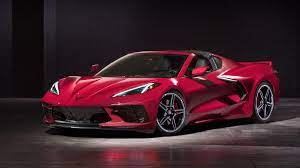
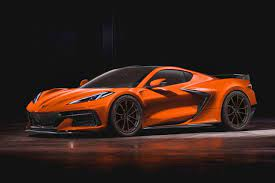
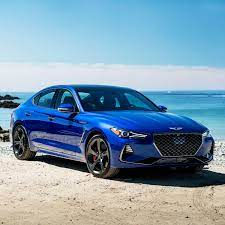
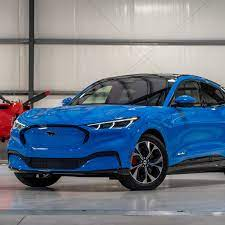
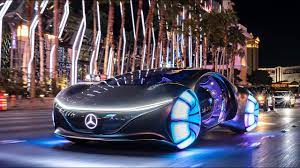

In [6]:
# getting the height of the page--
height = driver1.execute_script('return document.body.scrollHeight')

while True:
    driver1.execute_script('window.scrollTo(0,document.body.scrollHeight)')
    time.sleep(4)
    new = driver1.execute_script('return document.body.scrollHeight')
    if new== height:
        break
    height = new
cars_urls=[]    
car_tags = driver1.find_elements_by_xpath("//div[@class='bRMDJf islir']/img")
for i in car_tags:
    cars_urls.append(i.get_attribute('src'))
cars_urls
cu = cars_urls[:100]
#creating a dataframe containing  fruits images:
pd.set_option('display.max_colwidth', None)
cars_images = pd.DataFrame({"CARS_Images":cu})
cars_images

In [7]:
driver1 = webdriver.Chrome('chromedriver.exe')

In [8]:
url1 = 'https://images.google.com'
driver1.get(url1)
time.sleep(4)

In [9]:
#clicking the search bar--
driver1.find_element_by_xpath("//input[@class='gLFyf gsfi']").click()
#writing 'fruits' in the search bar--
driver1.find_element_by_xpath("//input[@class='gLFyf gsfi']").send_keys('Machine Learning')
#clicking the search button--
driver1.find_element_by_xpath("//button[@class='Tg7LZd']").click()


,Machine_learning_Images
0,
1,
2,
3,
4,
...,...
95,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQOMSanYLW--S2wtGTzqwOyT9mwm9YA4agS7g&usqp=CAU
96,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSWShvZgyNR29CrJJKSA3MdMJtKDaS-B-_6dw&usqp=CAU
97,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR9jSIVMuAS2N4w2cdGf5iA178b_C3Rz6wtvw&usqp=CAU
98,https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRmMHY0mHLtXgSZ7sSaRx1XacJOBj5dYNLPIQ&usqp=CAU

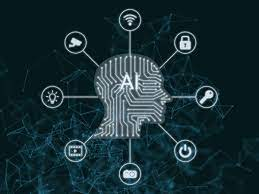
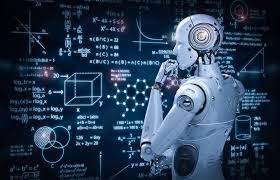
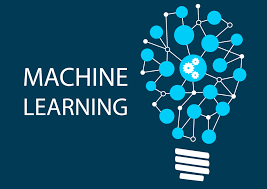
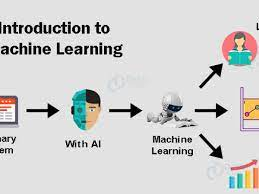
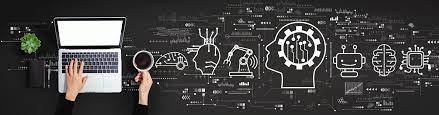

In [10]:
# getting the height of the page--
last_height = driver1.execute_script('return document.body.scrollHeight')

while True:
    driver1.execute_script('window.scrollTo(0,document.body.scrollHeight)')
    time.sleep(4)
    new_height = driver1.execute_script('return document.body.scrollHeight')
    if new_height== last_height:
        break
    last_height = new_height
ml_u=[]    
ml_tags = driver1.find_elements_by_xpath("//div[@class='bRMDJf islir']/img")
for i in ml_tags:
    ml_u.append(i.get_attribute('src'))
ml_u
ml = ml_u[:100]
#creating a dataframe containing  fruits images:
pd.set_option('display.max_colwidth', None)
ml_images = pd.DataFrame({"Machine_learning_Images":ml})
ml_images

## ANSWER TO QUESTION 4 OF WEB SCRAPING ASSIGNMENT 3:-

In [135]:
driver_flipkart = webdriver.Chrome('chromedriver.exe')

In [136]:
url_ = 'https://www.flipkart.com'
driver_flipkart.get(url_)
time.sleep(4)

In [137]:
#button click search
close_button = driver_flipkart.find_element_by_xpath("//button[@class='_2KpZ6l _2doB4z']")
close_button.click()


#job search bar
search_job = driver_flipkart.find_element_by_xpath("//input[@placeholder='Search for products, brands and more']")
search_job.send_keys("redmi note 10 pro max")


#button click search
search_button = driver_flipkart.find_element_by_xpath("//button[@class='L0Z3Pu']")
search_button.click()
time.sleep(3)

In [138]:
price=[]
prices_tags=driver_flipkart.find_elements_by_xpath("//div[@class='_30jeq3 _1_WHN1']")
for k in prices_tags:
    price.append(k.text)
price

['₹21,272',
 '₹20,798',
 '₹23,155',
 '₹20,972',
 '₹23,169',
 '₹17,999',
 '₹22,995',
 '₹18,999',
 '₹23,628',
 '₹16,999',
 '₹17,999',
 '₹16,999',
 '₹16,999',
 '₹16,999',
 '₹18,499',
 '₹18,499',
 '₹18,499',
 '₹18,499',
 '₹19,999',
 '₹19,999',
 '₹19,999']

In [139]:
urls=[]

product_urls=driver_flipkart.find_elements_by_xpath("//div[@class='_2kHMtA']/a")  
for i in product_urls:
    urls.append(i.get_attribute('href'))



urls    

['https://www.flipkart.com/redmi-note-10-pro-max-dark-night-128-gb/p/itmfcdaff39806aa?pid=MOBGF47CXHHGQ93Z&lid=LSTMOBGF47CXHHGQ93ZLY9BIW&marketplace=FLIPKART&q=redmi+note+10+pro+max&store=tyy%2F4io&srno=s_1_1&otracker=search&otracker1=search&fm=SEARCH&iid=2e181026-47c6-4fa6-87af-b76cb78671cf.MOBGF47CXHHGQ93Z.SEARCH&ppt=hp&ppn=homepage&ssid=9jzd45898g0000001624773255513&qH=88286fdabbe23b7f',
 'https://www.flipkart.com/redmi-note-10-pro-max-glacial-blue-128-gb/p/itmfcdaff39806aa?pid=MOBGF47CFGAVHZYC&lid=LSTMOBGF47CFGAVHZYCG4AMZK&marketplace=FLIPKART&q=redmi+note+10+pro+max&store=tyy%2F4io&srno=s_1_2&otracker=search&otracker1=search&fm=SEARCH&iid=2e181026-47c6-4fa6-87af-b76cb78671cf.MOBGF47CFGAVHZYC.SEARCH&ppt=hp&ppn=homepage&ssid=9jzd45898g0000001624773255513&qH=88286fdabbe23b7f',
 'https://www.flipkart.com/redmi-note-10-pro-max-vintage-bronze-128-gb/p/itm1d36ccd923ad3?pid=MOBGF47C7RCU6AHG&lid=LSTMOBGF47C7RCU6AHGLTTG6M&marketplace=FLIPKART&q=redmi+note+10+pro+max&store=tyy%2F4io&srno=s_1

In [140]:
len(urls)

21

In [141]:
Brand_Name=[]
smartphone_name=[]
colour=[]
specifications=[]


for ur in urls:

    driver_flipkart.get(ur)

    time.sleep(2)

    try:

        name = driver_flipkart.find_element_by_xpath("//span[@id='B_NuCI']")

        Brand_Name.append(name.text)

    except NoSuchElementException:

        Brand_Name.append("-")


    
  
        
        
    try:
        co=driver_flipkart.find_element_by_xpath("//table[@class='_14cfVK']/tbody/tr[4]/td[2]/ul/li")
        colour.append(co.text)
    except NoSuchElementException:
        colour.append('-')


for i in urls:
    page = requests.get(i)
    soup=BeautifulSoup(page.text,'lxml')
    table = soup.find_all('table',class_='_14cfVK')
    for u in table:
            specifications.append(u.text)
specifications

['In The BoxHandset, Power Adapter (33 W), USB Type-C Cable, Soft Protective Case, User Guide, Warranty CardModel NumberM2101K6IModel NameNote 10 Pro MaxColorDark NightBrowse TypeSmartphonesSIM TypeDual SimHybrid Sim SlotNoTouchscreenYesOTG CompatibleYesSound EnhancementsHi-Res Certified Audio, Dual Stereo Speakers, 2 Microphones',
 'Display Size16.94 cm (6.67 inch)Resolution2400 x 1080 PixelsResolution TypeFull HD+GPUAdreno 618Display TypeFull HD+ Super AMOLED DisplayOther Display Features120 Hz Refresh Rate, Corning Gorilla Glass 5, Peak Brightness: 1200 Nits, Contrast: 4,500,000:1, 100% DCI-P3 Colour Gamut, Supports HDR10',
 'Operating SystemAndroid 11Processor TypeQualcomm Snapdragon 732GProcessor CoreOcta CorePrimary Clock Speed2.3 GHzOperating Frequency2G GSM: B2/B3/B5/B8, 3G WCDMA: B1/B2/B5/B8, 4G LTE TDD: B40/B41, 4G LTE FDD: B1/B3/B5/B7/B8, CA: 3C/40C/41C',
 'Internal Storage128 GBRAM6 GBExpandable Storage512 GBSupported Memory Card TypemicroSDMemory Card Slot TypeDedicated Sl

In [142]:
len(specifications)

225

In [143]:
s1='.'.join(specifications[1:9])
s1

'Display Size16.94 cm (6.67 inch)Resolution2400 x 1080 PixelsResolution TypeFull HD+GPUAdreno 618Display TypeFull HD+ Super AMOLED DisplayOther Display Features120 Hz Refresh Rate, Corning Gorilla Glass 5, Peak Brightness: 1200 Nits, Contrast: 4,500,000:1, 100% DCI-P3 Colour Gamut, Supports HDR10.Operating SystemAndroid 11Processor TypeQualcomm Snapdragon 732GProcessor CoreOcta CorePrimary Clock Speed2.3 GHzOperating Frequency2G GSM: B2/B3/B5/B8, 3G WCDMA: B1/B2/B5/B8, 4G LTE TDD: B40/B41, 4G LTE FDD: B1/B3/B5/B7/B8, CA: 3C/40C/41C.Internal Storage128 GBRAM6 GBExpandable Storage512 GBSupported Memory Card TypemicroSDMemory Card Slot TypeDedicated Slot.Primary Camera AvailableYesPrimary Camera108MP + 8MP + 5MP + 2MPPrimary Camera FeaturesQuad Rear Camera Setup: 108 MP Primary (Samsung HM2 Sensor, Pixel Size: 0.7μm, f/1.9 Aperture, 9 in 1 Super Pixel, 6P Lens Number), 8 MP Ultra-wide Angle Camera with 118 Degree FOV, 5 MP Super Macro, 2 MP Depth Sensor, Photography Features: 108MP with S

In [144]:
s2='.'.join(specifications[11:19])
s2

'Display Size16.94 cm (6.67 inch)Resolution2400 x 1080 PixelsResolution TypeFull HD+GPUAdreno 618Display TypeFull HD+ Super AMOLED DisplayOther Display Features120 Hz Refresh Rate, Corning Gorilla Glass 5, Peak Brightness: 1200 Nits, Contrast: 4,500,000:1, 100% DCI-P3 Colour Gamut, Supports HDR10.Operating SystemAndroid 11Processor TypeQualcomm Snapdragon 732GProcessor CoreOcta CorePrimary Clock Speed2.3 GHzOperating Frequency2G GSM: B2/B3/B5/B8, 3G WCDMA: B1/B2/B5/B8, 4G LTE TDD: B40/B41, 4G LTE FDD: B1/B3/B5/B7/B8, CA: 3C/40C/41C.Internal Storage128 GBRAM6 GBExpandable Storage512 GBSupported Memory Card TypemicroSDMemory Card Slot TypeDedicated Slot.Primary Camera AvailableYesPrimary Camera108MP + 8MP + 5MP + 2MPPrimary Camera FeaturesQuad Rear Camera Setup: 108 MP Primary (Samsung HM2 Sensor, Pixel Size: 0.7μm, f/1.9 Aperture, 9 in 1 Super Pixel, 6P Lens Number), 8 MP Ultra-wide Angle Camera with 118 Degree FOV, 5 MP Super Macro, 2 MP Depth Sensor, Photography Features: 108MP with S

In [145]:
s3='.'.join(specifications[21:29])
s3

'Display Size16.94 cm (6.67 inch)Resolution2400 x 1080 PixelsResolution TypeFull HD+GPUAdreno 618Display TypeFull HD+ Super AMOLED DisplayOther Display Features120 Hz Refresh Rate, Corning Gorilla Glass 5, Peak Brightness: 1200 Nits, Contrast: 4,500,000:1, 100% DCI-P3 Colour Gamut, Supports HDR10.Operating SystemAndroid 11Processor TypeQualcomm Snapdragon 732GProcessor CoreOcta CorePrimary Clock Speed2.3 GHzOperating Frequency2G GSM: B2/B3/B5/B8, 3G WCDMA: B1/B2/B5/B8, 4G LTE TDD: B40/B41, 4G LTE FDD: B1/B3/B5/B7/B8, CA: 3C/40C/41C.Internal Storage128 GBRAM8 GBExpandable Storage512 GBSupported Memory Card TypemicroSDMemory Card Slot TypeDedicated Slot.Primary Camera AvailableYesPrimary Camera108MP + 8MP + 5MP + 2MPPrimary Camera FeaturesQuad Rear Camera Setup: 108 MP Primary (Samsung HM2 Sensor, Pixel Size: 0.7μm, f/1.9 Aperture, 9 in 1 Super Pixel, 6P Lens Number), 8 MP Ultra-wide Angle Camera with 118 Degree FOV, 5 MP Super Macro, 2 MP Depth Sensor, Photography Features: 108MP with S

In [146]:
s4='.'.join(specifications[31:39])
s4

'Display Size16.94 cm (6.67 inch)Resolution2400 x 1080 PixelsResolution TypeFull HD+GPUAdreno 618Display TypeFull HD+ Super AMOLED DisplayOther Display Features120 Hz Refresh Rate, Corning Gorilla Glass 5, Peak Brightness: 1200 Nits, Contrast: 4,500,000:1, 100% DCI-P3 Colour Gamut, Supports HDR10.Operating SystemAndroid 11Processor TypeQualcomm Snapdragon 732GProcessor CoreOcta CorePrimary Clock Speed2.3 GHzOperating Frequency2G GSM: B2/B3/B5/B8, 3G WCDMA: B1/B2/B5/B8, 4G LTE TDD: B40/B41, 4G LTE FDD: B1/B3/B5/B7/B8, CA: 3C/40C/41C.Internal Storage128 GBRAM6 GBExpandable Storage512 GBSupported Memory Card TypemicroSDMemory Card Slot TypeDedicated Slot.Primary Camera AvailableYesPrimary Camera108MP + 8MP + 5MP + 2MPPrimary Camera FeaturesQuad Rear Camera Setup: 108 MP Primary (Samsung HM2 Sensor, Pixel Size: 0.7μm, f/1.9 Aperture, 9 in 1 Super Pixel, 6P Lens Number), 8 MP Ultra-wide Angle Camera with 118 Degree FOV, 5 MP Super Macro, 2 MP Depth Sensor, Photography Features: 108MP with S

In [147]:
gh = list([s1,s2])
gh

['Display Size16.94 cm (6.67 inch)Resolution2400 x 1080 PixelsResolution TypeFull HD+GPUAdreno 618Display TypeFull HD+ Super AMOLED DisplayOther Display Features120 Hz Refresh Rate, Corning Gorilla Glass 5, Peak Brightness: 1200 Nits, Contrast: 4,500,000:1, 100% DCI-P3 Colour Gamut, Supports HDR10.Operating SystemAndroid 11Processor TypeQualcomm Snapdragon 732GProcessor CoreOcta CorePrimary Clock Speed2.3 GHzOperating Frequency2G GSM: B2/B3/B5/B8, 3G WCDMA: B1/B2/B5/B8, 4G LTE TDD: B40/B41, 4G LTE FDD: B1/B3/B5/B7/B8, CA: 3C/40C/41C.Internal Storage128 GBRAM6 GBExpandable Storage512 GBSupported Memory Card TypemicroSDMemory Card Slot TypeDedicated Slot.Primary Camera AvailableYesPrimary Camera108MP + 8MP + 5MP + 2MPPrimary Camera FeaturesQuad Rear Camera Setup: 108 MP Primary (Samsung HM2 Sensor, Pixel Size: 0.7μm, f/1.9 Aperture, 9 in 1 Super Pixel, 6P Lens Number), 8 MP Ultra-wide Angle Camera with 118 Degree FOV, 5 MP Super Macro, 2 MP Depth Sensor, Photography Features: 108MP with 

In [148]:
s5='.'.join(specifications[41:49])
s5

'Display Size16.94 cm (6.67 inch)Resolution2400 x 1080 PixelsResolution TypeFull HD+GPUAdreno 618Display TypeFull HD+ Super AMOLED DisplayOther Display Features120 Hz Refresh Rate, Corning Gorilla Glass 5, Peak Brightness: 1200 Nits, Contrast: 4,500,000:1, 100% DCI-P3 Colour Gamut, Supports HDR10.Operating SystemAndroid 11Processor TypeQualcomm Snapdragon 732GProcessor CoreOcta CorePrimary Clock Speed2.3 GHzOperating Frequency2G GSM: B2/B3/B5/B8, 3G WCDMA: B1/B2/B5/B8, 4G LTE TDD: B40/B41, 4G LTE FDD: B1/B3/B5/B7/B8, CA: 3C/40C/41C.Internal Storage128 GBRAM8 GBExpandable Storage512 GBSupported Memory Card TypemicroSDMemory Card Slot TypeDedicated Slot.Primary Camera AvailableYesPrimary Camera108MP + 8MP + 5MP + 2MPPrimary Camera FeaturesQuad Rear Camera Setup: 108 MP Primary (Samsung HM2 Sensor, Pixel Size: 0.7μm, f/1.9 Aperture, 9 in 1 Super Pixel, 6P Lens Number), 8 MP Ultra-wide Angle Camera with 118 Degree FOV, 5 MP Super Macro, 2 MP Depth Sensor, Photography Features: 108MP with S

In [149]:
s6='.'.join(specifications[51:60])
s6

'Display Size16.94 cm (6.67 inch)Resolution2400 x 1080 PixelsResolution TypeFull HD+GPUAdreno A618 (at 750MHz)Display TypeFull HD+ LCD DotDisplayHD Game SupportYesOther Display FeaturesCorning Gorilla Glass 5, Brightness: 450 nits (Typ), Contrast: 1500:1 (Typ) | NTSC: 84% (Typ), Standard Mode, Sunshine Mode, Night Mode, Color Temperature Adjustment, Anti-oil and Anti-fingerprint Protective Coating.Operating SystemAndroid 10Processor TypeQualcomm Snapdragon 720GProcessor CoreOcta CorePrimary Clock Speed2.3 GHzOperating Frequency2G GSM: B2/B3/B5/B8, 3G WCDMA: B1/B2/B5/B8, 4G LTE FDD: B1/B3/B5/B8, 4G LTE TDD: B40/B41 (2535-2655MHz).Internal Storage64 GBRAM6 GBExpandable Storage512 GBSupported Memory Card TypeMicroSDMemory Card Slot TypeDedicated Slot.Primary Camera AvailableYesPrimary Camera64MP + 8MP + 5MP + 2MPPrimary Camera Features64MP Primary Camera (1/1.7 inch CMOS Image Sensor, 1.6Î¼m 4-in-1 Super Pixel, f/1.89 Aperture) + 8MP Ultra-wide Angle Camera (Pixel Size: 1.12Î¼m, Aperture:

In [150]:
s7='.'.join(specifications[62:71])
s7

'Display Size16.94 cm (6.67 inch)Resolution2400 x 1080 PixelsResolution TypeFull HD+GPUAdreno A618 (at 750MHz)Display TypeFull HD+ LCD DotDisplayHD Game SupportYesOther Display FeaturesCorning Gorilla Glass 5, Brightness: 450 nits (Typ), Contrast: 1500:1 (Typ) | NTSC: 84% (Typ), Standard Mode, Sunshine Mode, Night Mode, Color Temperature Adjustment, Anti-oil and Anti-fingerprint Protective Coating.Operating SystemAndroid 10Processor TypeQualcomm Snapdragon 720GProcessor CoreOcta CorePrimary Clock Speed2.3 GHzOperating Frequency2G GSM: B2/B3/B5/B8, 3G WCDMA: B1/B2/B5/B8, 4G LTE FDD: B1/B3/B5/B8, 4G LTE TDD: B40/B41 (2535-2655MHz).Internal Storage128 GBRAM8 GBExpandable Storage512 GBSupported Memory Card TypeMicroSDMemory Card Slot TypeDedicated Slot.Primary Camera AvailableYesPrimary Camera64MP + 8MP + 5MP + 2MPPrimary Camera Features64MP Primary Camera (1/1.7 inch CMOS Image Sensor, 1.6Î¼m 4-in-1 Super Pixel, f/1.89 Aperture) + 8MP Ultra-wide Angle Camera (Pixel Size: 1.12Î¼m, Aperture

In [151]:
s8='.'.join(specifications[73:82])
s8

'Display Size16.94 cm (6.67 inch)Resolution2400 x 1080 PixelsResolution TypeFull HD+GPUAdreno A618 (at 750MHz)Display TypeFull HD+ LCD DotDisplayHD Game SupportYesOther Display FeaturesCorning Gorilla Glass 5, Brightness: 450 nits (Typ), Contrast: 1500:1 (Typ) | NTSC: 84% (Typ), Standard Mode, Sunshine Mode, Night Mode, Color Temperature Adjustment, Anti-oil and Anti-fingerprint Protective Coating.Operating SystemAndroid 10Processor TypeQualcomm Snapdragon 720GProcessor CoreOcta CorePrimary Clock Speed2.3 GHzOperating Frequency2G GSM: B2/B3/B5/B8, 3G WCDMA: B1/B2/B5/B8, 4G LTE FDD: B1/B3/B5/B8, 4G LTE TDD: B40/B41 (2535-2655MHz).Internal Storage64 GBRAM6 GBExpandable Storage512 GBSupported Memory Card TypeMicroSDMemory Card Slot TypeDedicated Slot.Primary Camera AvailableYesPrimary Camera64MP + 8MP + 5MP + 2MPPrimary Camera Features64MP Primary Camera (1/1.7 inch CMOS Image Sensor, 1.6Î¼m 4-in-1 Super Pixel, f/1.89 Aperture) + 8MP Ultra-wide Angle Camera (Pixel Size: 1.12Î¼m, Aperture:

In [152]:
s9='.'.join(specifications[84:93])
s9

'Display Size16.94 cm (6.67 inch)Resolution2400 x 1080 PixelsResolution TypeFull HD+GPUAdreno 618Display TypeFull HD+ Super AMOLED DisplayOther Display Features120 Hz Refresh Rate, Corning Gorilla Glass 5, Peak Brightness: 1200 Nits, Contrast: 4,500,000:1, 100% DCI-P3 Colour Gamut, Supports HDR10.Operating SystemAndroid 11Processor TypeQualcomm Snapdragon 732GProcessor CoreOcta CorePrimary Clock Speed2.3 GHzOperating Frequency2G GSM: B2/B3/B5/B8, 3G WCDMA: B1/B2/B5/B8, 4G LTE TDD: B40/B41, 4G LTE FDD: B1/B3/B5/B7/B8, CA: 3C/40C/41C.Internal Storage128 GBRAM8 GBExpandable Storage512 GBSupported Memory Card TypemicroSDMemory Card Slot TypeDedicated Slot.Primary Camera AvailableYesPrimary Camera108MP + 8MP + 5MP + 2MPPrimary Camera FeaturesQuad Rear Camera Setup: 108 MP Primary (Samsung HM2 Sensor, Pixel Size: 0.7μm, f/1.9 Aperture, 9 in 1 Super Pixel, 6P Lens Number), 8 MP Ultra-wide Angle Camera with 118 Degree FOV, 5 MP Super Macro, 2 MP Depth Sensor, Photography Features: 108MP with S

In [153]:
s10='.'.join(specifications[95:104])
s10

'Operating SystemAndroid Android Q 11Processor CoreOcta CorePrimary Clock Speed2.3 GHz.Internal Storage64 GBRAM6 GBMemory Card Slot TypeDedicated Slot.Primary Camera AvailableYesPrimary Camera108MP Rear CameraDual Camera LensPrimary Camera.Call Wait/HoldYesConference CallYesHands FreeYesVideo Call SupportYesCall DivertYesCall TimerYesSpeaker PhoneYesSpeed DialingYes.Network Type4GSupported NetworksGSMBluetooth SupportYesBluetooth Version5Wi-FiYesWi-Fi HotspotYesAudio Jack3.5 mmGPS SupportYes.SmartphoneYesSocial Networking PhoneYesInstant MessageYesRemovable BatteryNoSMSYesVoice InputYesSensorsLight sensor, Proximity sensor, Accelerometer, Compass, Gyroscope, ISOCELL Plus, Fingerprint Sensor.Battery Capacity5020 mAhBattery TypeLi-Polymer.Weight192 g.Warranty Summary1 year manufacturer warranty for device and 6 months manufacturer warranty for in-box accessories including batteries from the date of purchase'

In [154]:
s11='.'.join(specifications[106:114])
s11

'Operating SystemAndroid Android Q 11Processor CoreOcta CorePrimary Clock Speed2.3 GHz.Internal Storage64 GBRAM6 GBMemory Card Slot TypeDedicated Slot.Primary Camera AvailableYesPrimary Camera108MP Rear CameraDual Camera LensPrimary Camera.Call Wait/HoldYesConference CallYesHands FreeYesVideo Call SupportYesCall DivertYesCall TimerYesSpeaker PhoneYesSpeed DialingYes.Network Type4GSupported NetworksGSMBluetooth SupportYesBluetooth Version5Wi-FiYesWi-Fi HotspotYesAudio Jack3.5 mmGPS SupportYes.SmartphoneYesSocial Networking PhoneYesInstant MessageYesRemovable BatteryNoSMSYesVoice InputYesSensorsLight sensor, Proximity sensor, Accelerometer, Compass, Gyroscope, ISOCELL Plus, Fingerprint Sensor.Battery Capacity5020 mAhBattery TypeLi-Polymer.Weight192 g'

In [155]:
s12='.'.join(specifications[116:125])
s12

'Display Size16.94 cm (6.67 inch)Resolution1080 x 2400$$pixel.Operating SystemAndroid Android Q 11Processor CoreOcta CorePrimary Clock Speed2.3 GHz.Internal Storage64 GBRAM6 GBMemory Card Slot TypeDedicated Slot.Primary Camera AvailableYesPrimary Camera108MP Rear CameraDual Camera LensPrimary Camera.Call Wait/HoldYesConference CallYesHands FreeYesVideo Call SupportYesCall DivertYesCall TimerYesSpeaker PhoneYesSpeed DialingYes.Network Type4GSupported NetworksGSMBluetooth SupportYesBluetooth Version5Wi-FiYesWi-Fi HotspotYesAudio Jack3.5 mmGPS SupportYes.SmartphoneYesSocial Networking PhoneYesInstant MessageYesRemovable BatteryNoSMSYesVoice InputYesSensorsLight sensor, Proximity sensor, Accelerometer, Compass, Gyroscope, ISOCELL Plus, Fingerprint Sensor.Battery Capacity5020 mAhBattery TypeLi-Polymer.Weight192 g'

In [156]:
s13='.'.join(specifications[127:136])
s13

'Display Size16.94 cm (6.67 inch)Resolution2400 x 1080 PixelsResolution TypeFull HD+GPUAdreno A618 (at 750MHz)Display TypeFull HD+ LCD DotDisplayHD Game SupportYesOther Display FeaturesCorning Gorilla Glass 5, Brightness: 450 nits (Typ), Contrast: 1500:1 (Typ) | NTSC: 84% (Typ), Standard Mode, Sunshine Mode, Night Mode, Color Temperature Adjustment, Anti-oil and Anti-fingerprint Protective Coating.Operating SystemAndroid 10Processor TypeQualcomm Snapdragon 720GProcessor CoreOcta CorePrimary Clock Speed2.3 GHzOperating Frequency2G GSM: B2/B3/B5/B8, 3G WCDMA: B1/B2/B5/B8, 4G LTE FDD: B1/B3/B5/B8, 4G LTE TDD: B40/B41 (2535-2655MHz).Internal Storage64 GBRAM6 GBExpandable Storage512 GBSupported Memory Card TypeMicroSDMemory Card Slot TypeDedicated Slot.Primary Camera AvailableYesPrimary Camera64MP + 8MP + 5MP + 2MPPrimary Camera Features64MP Primary Camera (1/1.7 inch CMOS Image Sensor, 1.6Î¼m 4-in-1 Super Pixel, f/1.89 Aperture) + 8MP Ultra-wide Angle Camera (Pixel Size: 1.12Î¼m, Aperture:

In [157]:
s14='.'.join(specifications[138:147])
s14

'Display Size16.94 cm (6.67 inch)Resolution2400 x 1080 PixelsResolution TypeFull HD+GPUAdreno A618 (at 750MHz)Display TypeFull HD+ LCD DotDisplayHD Game SupportYesOther Display FeaturesCorning Gorilla Glass 5, Brightness: 450 nits (Typ), Contrast: 1500:1 (Typ) | NTSC: 84% (Typ), Standard Mode, Sunshine Mode, Night Mode, Color Temperature Adjustment, Anti-oil and Anti-fingerprint Protective Coating.Operating SystemAndroid 10Processor TypeQualcomm Snapdragon 720GProcessor CoreOcta CorePrimary Clock Speed2.3 GHzOperating Frequency2G GSM: B2/B3/B5/B8, 3G WCDMA: B1/B2/B5/B8, 4G LTE FDD: B1/B3/B5/B8, 4G LTE TDD: B40/B41 (2535-2655MHz).Internal Storage64 GBRAM6 GBExpandable Storage512 GBSupported Memory Card TypeMicroSDMemory Card Slot TypeDedicated Slot.Primary Camera AvailableYesPrimary Camera64MP + 8MP + 5MP + 2MPPrimary Camera Features64MP Primary Camera (1/1.7 inch CMOS Image Sensor, 1.6Î¼m 4-in-1 Super Pixel, f/1.89 Aperture) + 8MP Ultra-wide Angle Camera (Pixel Size: 1.12Î¼m, Aperture:

In [158]:
s15='.'.join(specifications[149:158])
s15

'Display Size16.94 cm (6.67 inch)Resolution2400 x 1080 PixelsResolution TypeFull HD+GPUAdreno A618 (at 750MHz)Display TypeFull HD+ LCD DotDisplayHD Game SupportYesOther Display FeaturesCorning Gorilla Glass 5, Brightness: 450 nits (Typ), Contrast: 1500:1 (Typ) | NTSC: 84% (Typ), Standard Mode, Sunshine Mode, Night Mode, Color Temperature Adjustment, Anti-oil and Anti-fingerprint Protective Coating.Operating SystemAndroid 10Processor TypeQualcomm Snapdragon 720GProcessor CoreOcta CorePrimary Clock Speed2.3 GHzOperating Frequency2G GSM: B2/B3/B5/B8, 3G WCDMA: B1/B2/B5/B8, 4G LTE FDD: B1/B3/B5/B8, 4G LTE TDD: B40/B41 (2535-2655MHz).Internal Storage128 GBRAM6 GBExpandable Storage512 GBSupported Memory Card TypeMicroSDMemory Card Slot TypeDedicated Slot.Primary Camera AvailableYesPrimary Camera64MP + 8MP + 5MP + 2MPPrimary Camera Features64MP Primary Camera (1/1.7 inch CMOS Image Sensor, 1.6Î¼m 4-in-1 Super Pixel, f/1.89 Aperture) + 8MP Ultra-wide Angle Camera (Pixel Size: 1.12Î¼m, Aperture

In [159]:
s16='.'.join(specifications[160:169])
s16

'Display Size16.94 cm (6.67 inch)Resolution2400 x 1080 PixelsResolution TypeFull HD+GPUAdreno A618 (at 750MHz)Display TypeFull HD+ LCD DotDisplayHD Game SupportYesOther Display FeaturesCorning Gorilla Glass 5, Brightness: 450 nits (Typ), Contrast: 1500:1 (Typ) | NTSC: 84% (Typ), Standard Mode, Sunshine Mode, Night Mode, Color Temperature Adjustment, Anti-oil and Anti-fingerprint Protective Coating.Operating SystemAndroid 10Processor TypeQualcomm Snapdragon 720GProcessor CoreOcta CorePrimary Clock Speed2.3 GHzOperating Frequency2G GSM: B2/B3/B5/B8, 3G WCDMA: B1/B2/B5/B8, 4G LTE FDD: B1/B3/B5/B8, 4G LTE TDD: B40/B41 (2535-2655MHz).Internal Storage128 GBRAM6 GBExpandable Storage512 GBSupported Memory Card TypeMicroSDMemory Card Slot TypeDedicated Slot.Primary Camera AvailableYesPrimary Camera64MP + 8MP + 5MP + 2MPPrimary Camera Features64MP Primary Camera (1/1.7 inch CMOS Image Sensor, 1.6Î¼m 4-in-1 Super Pixel, f/1.89 Aperture) + 8MP Ultra-wide Angle Camera (Pixel Size: 1.12Î¼m, Aperture

In [160]:
s17='.'.join(specifications[171:180])
s17

'Display Size16.94 cm (6.67 inch)Resolution2400 x 1080 PixelsResolution TypeFull HD+GPUAdreno A618 (at 750MHz)Display TypeFull HD+ LCD DotDisplayHD Game SupportYesOther Display FeaturesCorning Gorilla Glass 5, Brightness: 450 nits (Typ), Contrast: 1500:1 (Typ) | NTSC: 84% (Typ), Standard Mode, Sunshine Mode, Night Mode, Color Temperature Adjustment, Anti-oil and Anti-fingerprint Protective Coating.Operating SystemAndroid 10Processor TypeQualcomm Snapdragon 720GProcessor CoreOcta CorePrimary Clock Speed2.3 GHzOperating Frequency2G GSM: B2/B3/B5/B8, 3G WCDMA: B1/B2/B5/B8, 4G LTE FDD: B1/B3/B5/B8, 4G LTE TDD: B40/B41 (2535-2655MHz).Internal Storage128 GBRAM6 GBExpandable Storage512 GBSupported Memory Card TypeMicroSDMemory Card Slot TypeDedicated Slot.Primary Camera AvailableYesPrimary Camera64MP + 8MP + 5MP + 2MPPrimary Camera Features64MP Primary Camera (1/1.7 inch CMOS Image Sensor, 1.6Î¼m 4-in-1 Super Pixel, f/1.89 Aperture) + 8MP Ultra-wide Angle Camera (Pixel Size: 1.12Î¼m, Aperture

In [161]:
s18='.'.join(specifications[182:191])
s18

'Display Size16.94 cm (6.67 inch)Resolution2400 x 1080 PixelsResolution TypeFull HD+GPUAdreno A618 (at 750MHz)Display TypeFull HD+ LCD DotDisplayHD Game SupportYesOther Display FeaturesCorning Gorilla Glass 5, Brightness: 450 nits (Typ), Contrast: 1500:1 (Typ) | NTSC: 84% (Typ), Standard Mode, Sunshine Mode, Night Mode, Color Temperature Adjustment, Anti-oil and Anti-fingerprint Protective Coating.Operating SystemAndroid 10Processor TypeQualcomm Snapdragon 720GProcessor CoreOcta CorePrimary Clock Speed2.3 GHzOperating Frequency2G GSM: B2/B3/B5/B8, 3G WCDMA: B1/B2/B5/B8, 4G LTE FDD: B1/B3/B5/B8, 4G LTE TDD: B40/B41 (2535-2655MHz).Internal Storage128 GBRAM6 GBExpandable Storage512 GBSupported Memory Card TypeMicroSDMemory Card Slot TypeDedicated Slot.Primary Camera AvailableYesPrimary Camera64MP + 8MP + 5MP + 2MPPrimary Camera Features64MP Primary Camera (1/1.7 inch CMOS Image Sensor, 1.6Î¼m 4-in-1 Super Pixel, f/1.89 Aperture) + 8MP Ultra-wide Angle Camera (Pixel Size: 1.12Î¼m, Aperture

In [162]:
s19='.'.join(specifications[193:202])
s19

'Display Size16.94 cm (6.67 inch)Resolution2400 x 1080 PixelsResolution TypeFull HD+GPUAdreno A618 (at 750MHz)Display TypeFull HD+ LCD DotDisplayHD Game SupportYesOther Display FeaturesCorning Gorilla Glass 5, Brightness: 450 nits (Typ), Contrast: 1500:1 (Typ) | NTSC: 84% (Typ), Standard Mode, Sunshine Mode, Night Mode, Color Temperature Adjustment, Anti-oil and Anti-fingerprint Protective Coating.Operating SystemAndroid 10Processor TypeQualcomm Snapdragon 720GProcessor CoreOcta CorePrimary Clock Speed2.3 GHzOperating Frequency2G GSM: B2/B3/B5/B8, 3G WCDMA: B1/B2/B5/B8, 4G LTE FDD: B1/B3/B5/B8, 4G LTE TDD: B40/B41 (2535-2655MHz).Internal Storage128 GBRAM8 GBExpandable Storage512 GBSupported Memory Card TypeMicroSDMemory Card Slot TypeDedicated Slot.Primary Camera AvailableYesPrimary Camera64MP + 8MP + 5MP + 2MPPrimary Camera Features64MP Primary Camera (1/1.7 inch CMOS Image Sensor, 1.6Î¼m 4-in-1 Super Pixel, f/1.89 Aperture) + 8MP Ultra-wide Angle Camera (Pixel Size: 1.12Î¼m, Aperture

In [163]:
s20='.'.join(specifications[204:213])
s20

'Display Size16.94 cm (6.67 inch)Resolution2400 x 1080 PixelsResolution TypeFull HD+GPUAdreno A618 (at 750MHz)Display TypeFull HD+ LCD DotDisplayHD Game SupportYesOther Display FeaturesCorning Gorilla Glass 5, Brightness: 450 nits (Typ), Contrast: 1500:1 (Typ) | NTSC: 84% (Typ), Standard Mode, Sunshine Mode, Night Mode, Color Temperature Adjustment, Anti-oil and Anti-fingerprint Protective Coating.Operating SystemAndroid 10Processor TypeQualcomm Snapdragon 720GProcessor CoreOcta CorePrimary Clock Speed2.3 GHzOperating Frequency2G GSM: B2/B3/B5/B8, 3G WCDMA: B1/B2/B5/B8, 4G LTE FDD: B1/B3/B5/B8, 4G LTE TDD: B40/B41 (2535-2655MHz).Internal Storage128 GBRAM8 GBExpandable Storage512 GBSupported Memory Card TypeMicroSDMemory Card Slot TypeDedicated Slot.Primary Camera AvailableYesPrimary Camera64MP + 8MP + 5MP + 2MPPrimary Camera Features64MP Primary Camera (1/1.7 inch CMOS Image Sensor, 1.6Î¼m 4-in-1 Super Pixel, f/1.89 Aperture) + 8MP Ultra-wide Angle Camera (Pixel Size: 1.12Î¼m, Aperture

In [164]:
s21='.'.join(specifications[215:224])
s21

'Display Size16.94 cm (6.67 inch)Resolution2400 x 1080 PixelsResolution TypeFull HD+GPUAdreno A618 (at 750MHz)Display TypeFull HD+ LCD DotDisplayHD Game SupportYesOther Display FeaturesCorning Gorilla Glass 5, Brightness: 450 nits (Typ), Contrast: 1500:1 (Typ) | NTSC: 84% (Typ), Standard Mode, Sunshine Mode, Night Mode, Color Temperature Adjustment, Anti-oil and Anti-fingerprint Protective Coating.Operating SystemAndroid 10Processor TypeQualcomm Snapdragon 720GProcessor CoreOcta CorePrimary Clock Speed2.3 GHzOperating Frequency2G GSM: B2/B3/B5/B8, 3G WCDMA: B1/B2/B5/B8, 4G LTE FDD: B1/B3/B5/B8, 4G LTE TDD: B40/B41 (2535-2655MHz).Internal Storage128 GBRAM8 GBExpandable Storage512 GBSupported Memory Card TypeMicroSDMemory Card Slot TypeDedicated Slot.Primary Camera AvailableYesPrimary Camera64MP + 8MP + 5MP + 2MPPrimary Camera Features64MP Primary Camera (1/1.7 inch CMOS Image Sensor, 1.6Î¼m 4-in-1 Super Pixel, f/1.89 Aperture) + 8MP Ultra-wide Angle Camera (Pixel Size: 1.12Î¼m, Aperture

In [166]:
SPECIFICS=list([s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21])
len(SPECIFICS)

21

In [167]:
#creating a dataframe
pd.set_option('display.max_colwidth', None)
flipkart_data=pd.DataFrame({'Brand_name':Brand_Name,'Colour':colour,
                'Price':price,'Specifications':SPECIFICS,'Product_url':urls})
#printing dataframe
flipkart_data 

,Brand_name,Colour,Price,Specifications,Product_url
0,-,Dark Night,"₹21,272","Display Size16.94 cm (6.67 inch)Resolution2400 x 1080 PixelsResolution TypeFull HD+GPUAdreno 618Display TypeFull HD+ Super AMOLED DisplayOther Display Features120 Hz Refresh Rate, Corning Gorilla Glass 5, Peak Brightness: 1200 Nits, Contrast: 4,500,000:1, 100% DCI-P3 Colour Gamut, Supports HDR10.Operating SystemAndroid 11Processor TypeQualcomm Snapdragon 732GProcessor CoreOcta CorePrimary Clock Speed2.3 GHzOperating Frequency2G GSM: B2/B3/B5/B8, 3G WCDMA: B1/B2/B5/B8, 4G LTE TDD: B40/B41, 4G LTE FDD: B1/B3/B5/B7/B8, CA: 3C/40C/41C.Internal Storage128 GBRAM6 GBExpandable Storage512 GBSupported Memory Card TypemicroSDMemory Card Slot TypeDedicated Slot.Primary Camera AvailableYesPrimary Camera108MP + 8MP + 5MP + 2MPPrimary Camera FeaturesQuad Rear Camera Setup: 108 MP Primary (Samsung HM2 Sensor, Pixel Size: 0.7μm, f/1.9 Aperture, 9 in 1 Super Pixel, 6P Lens Number), 8 MP Ultra-wide Angle Camera with 118 Degree FOV, 5 MP Super Macro, 2 MP Depth Sensor, Photography Features: 108MP with Smart ISO, HDR, Night Mode 2.0, Magic Clone Photos, Long Exposure, Video Features: Vlog Mode, Dual Video, Magic Clone Videos, Short Video, Ultra-wide Angle Video Recording, FHD Macro Video Recording, Rear Camera Video Beautify, Time-lapse Video, Pro Video ModeSecondary Camera AvailableYesSecondary Camera16MP Front CameraSecondary Camera Features16MP In-display Front Camera (f/2.45 Aperture, 1.0μm Pixel Size), Front Camera Photography Features: Night Mode, Panorama, Beautify, Portrait, Video Features: Short Video, Slow Motion, Time LapseFlashRear FlashHD RecordingYesFull HD RecordingYesVideo RecordingYesVideo Recording ResolutionRear Camera: 4K (at 30fps), 1080P (at 60fps / 30fps), 720P (at 30fps), Ultra-wide Angle Video Recording: 1080P (at 30fps), 720P (at 30fps), Slow Motion Recording: 1080P (at 120fps), 720P (at 960fps / 240fps / 120fps), Front Camera: 1080P and 720P Recording (at 30fps)Frame Rate30 fps, 60 fpsDual Camera LensPrimary Camera.Network Type4G VOLTE, 4G, 3G, 2GSupported Networks4G VoLTE, 4G LTE, WCDMA, GSMInternet Connectivity4G, 3G, Wi-Fi, EDGE, GPRS3GYesGPRSYesPre-installed BrowserGoogle ChromeBluetooth SupportYesWi-FiYesWi-Fi Version802.11 a/b/g/n/ac (2.4 GHz| 5 GHz)Wi-Fi HotspotYesInfraredYesUSB ConnectivityYesEDGEYesAudio Jack3.5mmMap SupportGoogle MapsGPS SupportYes.SmartphoneYesSIM SizeNano + NanoUser InterfaceMIUI 12 (Based on Android 11)SMSYesSensors360 Degree Ambient Light Sensor, Proximity Sensor, E Compass, Accelerometer, Gyroscope, Side-mounted Fingerprint ScannerBrowserGoogle ChromeOther FeaturesUFS 2.2 Flash Storage, Splash, Water and Dust Resistant- IP53, Smart PA, Supports Dual SIM VoLTE HD Calling, Z- Axis Vibration MotorGPS TypeGPS/AGPS, GLONASS, BeiDou.Battery Capacity5020 mAh.Width76.15 mmHeight164.5 mmDepth8.1 mmWeight192 g",https://www.flipkart.com/redmi-note-10-pro-max-dark-night-128-gb/p/itmfcdaff39806aa?pid=MOBGF47CXHHGQ93Z&lid=LSTMOBGF47CXHHGQ93ZLY9BIW&marketplace=FLIPKART&q=redmi+note+10+pro+max&store=tyy%2F4io&srno=s_1_1&otracker=search&otracker1=search&fm=SEARCH&iid=2e181026-47c6-4fa6-87af-b76cb78671cf.MOBGF47CXHHGQ93Z.SEARCH&ppt=hp&ppn=homepage&ssid=9jzd45898g0000001624773255513&qH=88286fdabbe23b7f
1,-,Glacial Blue,"₹20,798","Display Size16.94 cm (6.67 inch)Resolution2400 x 1080 PixelsResolution TypeFull HD+GPUAdreno 618Display TypeFull HD+ Super AMOLED DisplayOther Display Features120 Hz Refresh Rate, Corning Gorilla Glass 5, Peak Brightness: 1200 Nits, Contrast: 4,500,000:1, 100% DCI-P3 Colour Gamut, Supports HDR10.Operating SystemAndroid 11Processor TypeQualcomm Snapdragon 732GProcessor CoreOcta CorePrimary Clock Speed2.3 GHzOperating Frequency2G GSM: B2/B3/B5/B8, 3G WCDMA: B1/B2/B5/B8, 4G LTE TDD: B40/B41, 4G LTE FDD: B1/B3/B5/B7/B8, CA: 3C/40C/41C.Internal Storage128 GBRAM6 GBExpandable Storage512 GBSupported Memory Card TypemicroSDMemory Card Slot TypeDedicated Slot.Primary Camera AvailableYesPrimary Camera108MP + 8MP + 

## ANSWER TO QUESTION 5 OF WEB SCRAPING ASSIGNMENT 3:-

In [121]:
import requests

In [149]:
driver2 = webdriver.Chrome('chromedriver.exe')

In [157]:
url2 = 'https://www.google.com/maps'
driver2.get(url2)
time.sleep(4)

In [158]:
#search_bar click--
driver2.find_element_by_xpath("//input[@autofocus='autofocus']").click()

#type city='Bangalore' in the search bar
driver2.find_element_by_xpath("//input[@autofocus='autofocus']").send_keys('Bangalore')

#clicking the search button--
driver2.find_element_by_xpath("//div[@class='searchbox-searchbutton-container']").click()

In [159]:
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.action_chains import ActionChains

In [161]:
wait = WebDriverWait(driver2, 10)
wait.until(EC.element_to_be_clickable((By.ID, "searchboxinput"))).send_keys("Bangalore")
wait.until(EC.element_to_be_clickable((By.ID, "searchbox-searchbutton"))).click()
time.sleep(5)
ActionChains(driver2).move_to_element(driver2.find_element_by_xpath("//html/body")).context_click().perform()
print(wait.until(EC.visibility_of_element_located((By.CSS_SELECTOR, "ul[role='menu']>li div div[class*='text']:nth-of-type(1)"))).text)

12.95385, 77.35074


## ANSWER TO QUESTION 6 OF WEB SCRAPING ASSIGNMENT 3:-

In [47]:
import requests

In [48]:
url3 = 'https://trak.in/india-startup-funding-investment-2015'

In [25]:
# total 25 entries numbers button click--
driver3.find_element_by_xpath("//select[@name='tablepress-50_length']/option[2]").click()
driver3.find_element_by_xpath("//select[@name='tablepress-49_length']/option[2]").click()
driver3.find_element_by_xpath("//select[@name='tablepress-48_length']/option[2]").click()

In [67]:

page = requests.get(url3)
soup=BeautifulSoup(page.text,'lxml')
table = soup.find('table',id='tablepress-50')
table.find_all('th')


headers=[]
for i in table.find_all('th'):
    headers.append(i.text)
headers
september_data=pd.DataFrame(columns=headers)
september_data

for j in table.find_all('tr')[1:]:
    rows=j.find_all('td')
    row = [tr.text.replace('\n','') for tr in rows]
    length = len(september_data)
    september_data.loc[length]=row
    september_data.loc[length]


september_data

,Sr. No.,Date (dd/mm/yyyy),Startup Name,Industry / Vertical,Sub-Vertical,City / Location,Investors' Name,Investment Type,Amount (In USD)
0,1,08/09/2020,Byju’s,EduTech,Online Tutoring,Bangalore,"Silver Lake, Tiger Global, General Atlantic an...",Private Equity,"500,000,000"
1,2,12/09/2020,mCaffeine,Personal Care,Skincare & Haircare,Mumbai,"Amicus Capital Private Equity I LLP, Amicus Ca...",Series B,"3,000,000"
2,3,09/09/2020,Qshala,EduTech,Online Curiosity Platform for Kids,Bangalore,Rainmatter Capital,Angel,"370,000"
3,4,02/09/2020,Winzo,Online Gaming,Online Gaming,New Delhi,"Kalaari Capital Partners, IndigoEdge Managemen...",Series B,"15,500,000"
4,5,09/09/2020,Hippo Video,Video Customer Experience(CX) Platform,Video Customer Experience(CX) Platform,"Newark, Delaware, United States of Amercia","Alpha Wave Incubation, Exfinity Venture Partne...",Series A,"4,500,000"
5,6,07/09/2020,Melorra,E-commerce,Online Jewelry Store,Bangalore,"Shadow Holdings, Lightbox.",Debt Financing,"upto 8,900,000"
6,7,07/09/2020,1mg,E-commerce,Online Pharmacy,Gurgaon,"Gaja Capital, Tata Capital, Partners Group",In Progress,"100,000,000"
7,8,31/08/2020,mfine,HealthTech,On-Demand Healthcare Services,Bangalore,Caretech Pte Inc,Series B,"5,400,000"
8,9,31/08/2020,Apna,Human Resources,Recruitment Platform,Bangalore,Lightspeed India and Sequoia Capital India,Series A,"8,000,000"
9,10,03/09/2020,Railofy,Transportation,WL & RAC protection platform,Mumbai,Chiratae Ventures,Seed,"950,000"


In [68]:
page = requests.get(url3)
soup=BeautifulSoup(page.text,'lxml')
table = soup.find('table',id='tablepress-50')
table.find_all('th')


headers=[]
for i in table.find_all('th'):
    headers.append(i.text)
headers
august_data=pd.DataFrame(columns=headers)
august_data

for j in table.find_all('tr')[1:]:
    rows=j.find_all('td')
    row = [tr.text.replace('\n','') for tr in rows]
    length = len(august_data)
    august_data.loc[length]=row
    august_data.loc[length]


august_data

,Sr. No.,Date (dd/mm/yyyy),Startup Name,Industry / Vertical,Sub-Vertical,City / Location,Investors' Name,Investment Type,Amount (In USD)
0,1,08/09/2020,Byju’s,EduTech,Online Tutoring,Bangalore,"Silver Lake, Tiger Global, General Atlantic an...",Private Equity,"500,000,000"
1,2,12/09/2020,mCaffeine,Personal Care,Skincare & Haircare,Mumbai,"Amicus Capital Private Equity I LLP, Amicus Ca...",Series B,"3,000,000"
2,3,09/09/2020,Qshala,EduTech,Online Curiosity Platform for Kids,Bangalore,Rainmatter Capital,Angel,"370,000"
3,4,02/09/2020,Winzo,Online Gaming,Online Gaming,New Delhi,"Kalaari Capital Partners, IndigoEdge Managemen...",Series B,"15,500,000"
4,5,09/09/2020,Hippo Video,Video Customer Experience(CX) Platform,Video Customer Experience(CX) Platform,"Newark, Delaware, United States of Amercia","Alpha Wave Incubation, Exfinity Venture Partne...",Series A,"4,500,000"
5,6,07/09/2020,Melorra,E-commerce,Online Jewelry Store,Bangalore,"Shadow Holdings, Lightbox.",Debt Financing,"upto 8,900,000"
6,7,07/09/2020,1mg,E-commerce,Online Pharmacy,Gurgaon,"Gaja Capital, Tata Capital, Partners Group",In Progress,"100,000,000"
7,8,31/08/2020,mfine,HealthTech,On-Demand Healthcare Services,Bangalore,Caretech Pte Inc,Series B,"5,400,000"
8,9,31/08/2020,Apna,Human Resources,Recruitment Platform,Bangalore,Lightspeed India and Sequoia Capital India,Series A,"8,000,000"
9,10,03/09/2020,Railofy,Transportation,WL & RAC protection platform,Mumbai,Chiratae Ventures,Seed,"950,000"


In [69]:
page = requests.get(url3)
soup=BeautifulSoup(page.text,'lxml')
table = soup.find('table',id='tablepress-49')
table.find_all('th')


headers=[]
for i in table.find_all('th'):
    headers.append(i.text)
headers
july_data=pd.DataFrame(columns=headers)
july_data

for j in table.find_all('tr')[1:]:
    rows=j.find_all('td')
    row = [tr.text.replace('\n','') for tr in rows]
    length = len(july_data)
    july_data.loc[length]=row
    july_data.loc[length]


july_data

,Sr. No.,Date (dd/mm/yyyy),Startup Name,Industry / Vertical,Sub-Vertical,City / Location,Investors' Name,Investment Type,Amount (In USD)
0,1,15/08/2020,Practo,HealthTech,Health care and Wellness,Bangalore,A1A Company,Series F,"32,000,000"
1,2,13/08/2020,Medlife,E-commerce,Online Pharmacy,Bangalore,Prasid Uno Family Trust and SC Credit Fund,,"23,000,000"
2,3,13/08/2020,HungerBox,FoodTech,Online Food Delivery Service,Bangalore,"One97, Sabre Partners Trust, Pratithi Investme...",Series D1,"1,560,000"
3,4,04/08/2020,Dunzo,Hyper-local Logistics,Online Delivery Services,Bangalore,Existing Backers,In Progress,"30,000,000"
4,5,11/08/2020,Terra.do,EduTech,"Online Climate School, E-learning","Stanford, California,","Stanford Angels and Entrepreneurs (India), BEE...",Seed,"1,400,000"
5,6,12/08/2020,Classplus,EduTech,"E-learning, Online Tutoring",Noida,Falcon Edge,In Progress,"upto 15,000,000"
6,7,14/08/2020,Niyo,FinTech,Financial Services,Bangalore,Niyo Solutions Inc.,,"6,000,000"
7,8,10/08/2020,ZestMoney,FinTech,Financial Services,Bangalore,Primrose Hills Ventures,,"10,670,000"
8,9,07/08/2020,FreshToHome,E-commerce,Food Delivery,Bangalore,Ascent Capital,Venture,"16,200,000"
9,10,13/08/2020,Eduvanz,FinTech,Financial Services,Mumbai,"Sequoia India, Unitus",Series A,"5,000,000"


In [66]:
page = requests.get(url3)
soup=BeautifulSoup(page.text,'lxml')
table = soup.find('table',id='tablepress-48')
table.find_all('th')


headers=[]
for i in table.find_all('th'):
    headers.append(i.text)
headers
df2=pd.DataFrame(columns=headers)
df2

for j in table.find_all('tr')[1:]:
    rows=j.find_all('td')
    row = [tr.text.replace('\n','') for tr in rows]
    length = len(df2)
    df2.loc[length]=row
    df2.loc[length]


df2

,Sr. No.,Date (dd/mm/yyyy),Startup Name,Industry / Vertical,Sub-Vertical,City / Location,Investors' Name,Investment Type,Amount (In USD)
0,1,15/07/2020,Flipkart,E-commerce,E-commerce,Bangalore,Walmart Inc,M&A,"1,200,000,000"
1,2,16/07/2020,Vedantu,EduTech,Online Tutoring,Bangalore,Coatue Management,Series D,"100,000,000"
2,3,16/07/2020,Crio,EduTech,Learning Platform for Developers,Bangalore,021 Capital,pre-Series A,"934,160"
3,4,14/07/2020,goDutch,FinTech,Group Payments,Mumbai,"Matrix India,Y Combinator, Global Founders Cap...",Seed,"1,700,000"
4,5,13/07/2020,Mystifly,Airfare Marketplace,"Ticketing, Airline Retailing, and Post-Ticket...",Singapore and Bangalore,Recruit Co. Ltd.,pre-Series B,"3,300,000"
5,6,09/07/2020,JetSynthesys,Gaming and Entertainment,Gaming and Entertainment,Pune,Adar Poonawalla and Kris Gopalakrishnan.,Venture-Series Unknown,"400,000"
6,7,10/07/2020,gigIndia,Marketplace,"Crowd Sourcing, Freelance",Pune,Incubate Fund India and Beyond Next Ventures,pre-Series A,"974,200"
7,8,15/07/2020,PumPumPum,Automotive Rental,Used Car-leasing platform,Gurgaon,Early Adapters Syndicate,Seed,"292,800"
8,9,14/07/2020,FLYX,OTT Player,Streaming Social Network,New York and Delhi,"Raj Mishra, founder of AIT Global Inc",pre-Seed,"200,000"
9,10,13/07/2020,Open Appliances Pvt. Ltd.,Information Technology,Internet-of-Things Security Solutions,Bangalore,Unicorn India Ventures,Venture-Series Unknown,"500,000"


## ANSWER TO QUESTION 7 OF WEB SCRAPING ASSIGNMENT 3:-

In [2]:
driver3 = webdriver.Chrome('chromedriver.exe')


In [3]:
url33 = 'https://www.digit.in'
driver3.get(url33)
time.sleep(4)

In [4]:
driver3.find_element_by_xpath("/html/body/div[3]/div/div[2]/div[2]/div[4]/ul/li[9]/a").click()

In [5]:
game_urls=[]

g_urls=driver3.find_elements_by_xpath("//div[@class='full-specs']/span")  
for i in g_urls:
    game_urls.append(i.get_attribute('data-href'))



game_urls

['https://www.digit.in/laptops/alienware-area-51m-r2-price-228193.html',
 None,
 'https://www.digit.in/laptops/alienware-m15-r3-price-228207.html',
 None,
 None,
 'https://www.digit.in/laptops/asus-rog-strix-scar-15-price-228221.html',
 None,
 None,
 'https://www.digit.in/laptops/asus-rog-zephyrus-g14-price-209173.html',
 None,
 'https://www.digit.in/laptops/lenovo-legion-5i-price-228235.html',
 None,
 'https://www.digit.in/laptops/asus-rog-zephyrus-duo-15-price-215799.html',
 None,
 None,
 'https://www.digit.in/laptops/acer-aspire-7-gaming-price-223781.html',
 None]

In [6]:
removes=[None]
result_lst = list(set(game_urls) - set(removes))
result_lst

['https://www.digit.in/laptops/alienware-m15-r3-price-228207.html',
 'https://www.digit.in/laptops/asus-rog-strix-scar-15-price-228221.html',
 'https://www.digit.in/laptops/alienware-area-51m-r2-price-228193.html',
 'https://www.digit.in/laptops/asus-rog-zephyrus-g14-price-209173.html',
 'https://www.digit.in/laptops/acer-aspire-7-gaming-price-223781.html',
 'https://www.digit.in/laptops/lenovo-legion-5i-price-228235.html',
 'https://www.digit.in/laptops/asus-rog-zephyrus-duo-15-price-215799.html']

In [13]:
model_name_and_operaing_system=[]
display=[]
memory=[]
physical_specifications=[]
processor=[]
storage=[]


for ur in result_lst:

    driver3.get(ur)

    time.sleep(2)

    try:

        name = driver3.find_element_by_xpath("//div[@id='specs-basic-information']/div[2]")

        model_name_and_operaing_system.append(name.text.replace("\n",","))

    except NoSuchElementException:

        model_name_and_operaing_system.append("-")

    try:

        dpl = driver3.find_element_by_xpath("//div[@id='specs-display']/div[2]")

        display.append(dpl.text.replace("\n",","))

    except NoSuchElementException:

        display.append("-")
    
    try:

        me = driver3.find_element_by_xpath("//div[@id='specs-memory']/div[2]")

        memory.append(me.text.replace("\n",","))

    except NoSuchElementException:

        memory.append("-")
        
    try:

        ps = driver3.find_element_by_xpath("//div[@id='specs-physical-specifications']/div[2]")

        physical_specifications.append(ps.text.replace("\n",","))

    except NoSuchElementException:

        physical_specifications.append("-")
        
    try:

        pro = driver3.find_element_by_xpath("//div[@id='specs-processor']/div[2]")

        processor.append(pro.text.replace("\n",","))

    except NoSuchElementException:

        processor.append("-")
        
    try:

        st = driver3.find_element_by_xpath("//div[@id='specs-storage']/div[2]")

        storage.append(st.text.replace("\n",","))

    except NoSuchElementException:

        storage.append("-")

pd.set_option('display.max_colwidth', None)
digit_in_data=pd.DataFrame({'MODEL_NAME':model_name_and_operaing_system,'DISPLAY':display,'MEMORY':memory,'PHYSICAL_SPECIFICATIONS':physical_specifications,'PROCESSOR':processor,'STORAGE':storage})
digit_in_data

,MODEL_NAME,DISPLAY,MEMORY,PHYSICAL_SPECIFICATIONS,PROCESSOR,STORAGE
0,"Model Name : m15 R3,Operating System (With Version) : Windows 10 Home","Resolution : 3840 x 2160,Display Size (In Inches) : 15.6","Ram Included (In Gb) : 16 GB,Ram Type : DDR4",-,"Processor Model Name : 10th Generation Intel® Core™ i9-10980HK,Cores : 8,Cache L3 : 16MB,Boost Clock Speed : 5.3GHz","Storage Drive Type : SSD,Storage Drive Capacity : 1 TB"
1,"Model Name : ASUS,Operating System (With Version) : Windows 10 Home","Resolution : 1920 x 1080,Display Size (In Inches) : 15.6","Ram Included (In Gb) : 16 GB,Ram Type : DDR4","Laptop Weight (In Kgs) : 2.30,Laptop Dimension (In Mm) : 35.4 x 25.9 x 2.26","Processor Model Name : AMD Ryzen™ 9 5900HX,Clock Speed : 3.3 GHz,Graphics Processor : NVIDIA® GeForce RTX™ 3070,Cache L3 : 16M,Boost Clock Speed : 4.6 GHz","Storage Drive Type : SSD,Storage Drive Capacity : 1 TB"
2,"Model Name : Area 51M R2,Operating System (With Version) : Windows 10 Home","Resolution : 1920 x 1080,Display Size (In Inches) : 17.3","Ram Included (In Gb) : 16 GB,Ram Type : DDR4","Laptop Weight (In Kgs) : 4.1,Laptop Dimension (In Mm) : 27.65 x 402.6 x 319.14","Processor Model Name : 10th Generation Intel® Core™ i7-10700,Clock Speed : 2.90 GHz,Cores : 8,Graphics Processor : Intel® UHD Graphics 630,Cache L3 : 16 MB,Boost Clock Speed : 4.80 GHz","Storage Drive Type : SSD,Storage Drive Capacity : 1 TB"
3,"Model Name : ROG Zephyrus G14,Operating System (With Version) : Windows 10 Home,Laptop Type : Gaming","Resolution : 1920 x 1080,Display Size (In Inches) : 14","Ram Included (In Gb) : 16 GB,Ram Type : DDR4","Laptop Weight (In Kgs) : 1.65,Laptop Dimension (In Mm) : 32.5 x 22.1 x 1.8","Processor Model Name : AMD 3rd Generation Ryzen 9,Clock Speed : 3.3 GHz,Cores : Quad Core,Graphics Processor : NVIDIA GeForce RTX 2060,Cache L3 : 8 MB","Storage Drive Type : SSD,Storage Drive Capacity : 1 TB"
4,"Model Name : Aspire 7 Gaming,Operating System (With Version) : Windows 10 Home","Resolution : 1920 x 1080,Display Size (In Inches) : 15.6","Ram Included (In Gb) : 8 GB,Ram Type : DDR4","Laptop Weight (In Kgs) : 2.15,Laptop Dimension (In Mm) : 2.29 x 36.3 x 25.4","Processor Model Name : AMD Ryzen™ 5-5500U hexa-core,Graphics Processor : NVIDIA® GeForce® GTX 1650","Storage Drive Type : SSD,Storage Drive Capacity : 512 GB"
5,"Model Name : Legion 5i,Operating System (With Version) : Windows 10 Pro","Resolution : 1920 x 1080,Display Size (In Inches) : 15.6","Ram Included (In Gb) : 16 GB,Ram Type : DDR4","Laptop Weight (In Kgs) : 2.3,Laptop Dimension (In Mm) : 363.06 x 259.61 x 23.57","Processor Model Name : 10th Generation Intel® Core™ i5-10300H,Clock Speed : 2.50 GHz,Cores : 4,Graphics Processor : NVIDIA® GeForce® GTX 1650 4GB,Cache L3 : 8 MB,Boost Clock Speed : 4.50 GH","Storage Drive Type : SSD,Storage Drive Capacity : 1 TB"
6,"Model Name : ROG Zephyrus Duo 15,Operating System (With Version) : Windows 10","Resolution : 3840 x 1100,Display Size (In Inches) : 15.6,Refresh Rate : 60 Hz","Ram Included (In Gb) : 4 GB,Ram Type : DDR4","Laptop Weight (In Kgs) : 2.4,Laptop Dimension (In Mm) : 268.30 x 360.00 x 20.90","Processor Model Name : Intel Core i7 10th Gen 10875H,Graphics Processor : NVIDIA GeForce RTX 2070 Max-Q","Storage Drive Type : SSD,Storage Drive Capacity : 512 GB"


## ANSWER TO QUESTION 8 OF WEB SCRAPING ASSIGNMENT 3:-

In [2]:
driver_forbes = webdriver.Chrome('chromedriver.exe')

In [3]:
url_forbes = 'https://www.forbes.com'
driver_forbes.get(url_forbes)
time.sleep(4)

In [4]:
#header click--
driver_forbes.find_element_by_xpath("//div[@class='header__left']").click()

In [5]:
#billionaires click--
driver_forbes.find_element_by_xpath("//li[@class='header__channel header__color--centennial-silver header__hoverable']").click()

In [6]:
url_world_billions = "https://www.forbes.com/billionaires"

In [7]:
driver_forbes.get(url_world_billions)
time.sleep(2)

In [13]:
page_forbes = requests.get(url_world_billions)
soup_forbes=BeautifulSoup(page_forbes.text,'lxml')
table = driver_forbes.find_element_by_xpath("//div[@class='header-row']")
table.find_elements_by_xpath("//div[@role='columnheader']")

headers=[]
for i in table.find_elements_by_xpath("//div[@role='columnheader']"):
    headers.append(i.text)
headers
df_forbes=pd.DataFrame(columns=headers)
df_forbes

                
            

,RANK,NAME,NET WORTH,AGE,COUNTRY / TERRITORY,SOURCE,INDUSTRY


In [22]:
rank=[]
name=[]
netw=[]
age=[]
country=[]
source=[]
industry=[]

rs = driver_forbes.find_elements_by_xpath("//div[@class='rank']")
for i in rs:
    try:
        rank.append(i.text)
    except NoSuchElementException:
        rank.append("-")
n = driver_forbes.find_elements_by_xpath("//div[@class='personName']")
for i in n:
    try:
        name.append(i.text)
    except NoSuchElementException:
        name.append("-")    
nw = driver_forbes.find_elements_by_xpath("//div[@class='netWorth']")
for i in nw:
    try:
        netw.append(i.text)
    except NoSuchElementException:
        netw.append("-") 

ag = driver_forbes.find_elements_by_xpath("//div[@class='age']")
for i in ag:
    try:
        age.append(i.text)
    except NoSuchElementException:
        age.append("-") 

cy = driver_forbes.find_elements_by_xpath("//div[@class='countryOfCitizenship']")
for i in cy:
    try:
        country.append(i.text)
    except NoSuchElementException:
        country.append("-") 

srce= driver_forbes.find_elements_by_xpath("//div[@class='source']")
for i in srce:
    try:
        source.append(i.text)
    except NoSuchElementException:
        source.append("-") 

        
ind = driver_forbes.find_elements_by_xpath("//div[@class='category']")
for i in ind:
    try:
        industry.append(i.text)
    except NoSuchElementException:
        industry.append("-") 



,RANK,NAME,NETWORTH,AGE,COUNTRY,SOURCE,INDUSTRY
0,1.,Jeff Bezos,$177 B,57,United States,Amazon,Technology
1,2.,Elon Musk,$151 B,49,United States,"Tesla, SpaceX",Automotive
2,3.,Bernard Arnault & family,$150 B,72,France,LVMH,Fashion & Retail
3,4.,Bill Gates,$124 B,65,United States,Microsoft,Technology
4,5.,Mark Zuckerberg,$97 B,36,United States,Facebook,Technology
...,...,...,...,...,...,...,...
195,195.,Harry Triguboff,$11.2 B,88,Australia,real estate,Real Estate
196,197.,Leonid Fedun & family,$11.1 B,65,Russia,oil,Energy
197,197.,Eyal Ofer,$11.1 B,70,Israel,"real estate, shipping",Diversified
198,197.,Evan Spiegel,$11.1 B,30,United States,Snapchat,Technology


In [23]:
driver_forbes.find_element_by_xpath("//div[@class='next-page']").click()

In [24]:
rs = driver_forbes.find_elements_by_xpath("//div[@class='rank']")
for i in rs:
    try:
        rank.append(i.text)
    except NoSuchElementException:
        rank.append("-")
n = driver_forbes.find_elements_by_xpath("//div[@class='personName']")
for i in n:
    try:
        name.append(i.text)
    except NoSuchElementException:
        name.append("-")    
nw = driver_forbes.find_elements_by_xpath("//div[@class='netWorth']")
for i in nw:
    try:
        netw.append(i.text)
    except NoSuchElementException:
        netw.append("-") 

ag = driver_forbes.find_elements_by_xpath("//div[@class='age']")
for i in ag:
    try:
        age.append(i.text)
    except NoSuchElementException:
        age.append("-") 

cy = driver_forbes.find_elements_by_xpath("//div[@class='countryOfCitizenship']")
for i in cy:
    try:
        country.append(i.text)
    except NoSuchElementException:
        country.append("-") 

srce= driver_forbes.find_elements_by_xpath("//div[@class='source']")
for i in srce:
    try:
        source.append(i.text)
    except NoSuchElementException:
        source.append("-") 

        
ind = driver_forbes.find_elements_by_xpath("//div[@class='category']")
for i in ind:
    try:
        industry.append(i.text)
    except NoSuchElementException:
        industry.append("-") 

In [25]:
driver_forbes.find_element_by_xpath("//div[@class='next-page']").click()

In [26]:
rs = driver_forbes.find_elements_by_xpath("//div[@class='rank']")
for i in rs:
    try:
        rank.append(i.text)
    except NoSuchElementException:
        rank.append("-")
n = driver_forbes.find_elements_by_xpath("//div[@class='personName']")
for i in n:
    try:
        name.append(i.text)
    except NoSuchElementException:
        name.append("-")    
nw = driver_forbes.find_elements_by_xpath("//div[@class='netWorth']")
for i in nw:
    try:
        netw.append(i.text)
    except NoSuchElementException:
        netw.append("-") 

ag = driver_forbes.find_elements_by_xpath("//div[@class='age']")
for i in ag:
    try:
        age.append(i.text)
    except NoSuchElementException:
        age.append("-") 

cy = driver_forbes.find_elements_by_xpath("//div[@class='countryOfCitizenship']")
for i in cy:
    try:
        country.append(i.text)
    except NoSuchElementException:
        country.append("-") 

srce= driver_forbes.find_elements_by_xpath("//div[@class='source']")
for i in srce:
    try:
        source.append(i.text)
    except NoSuchElementException:
        source.append("-") 

        
ind = driver_forbes.find_elements_by_xpath("//div[@class='category']")
for i in ind:
    try:
        industry.append(i.text)
    except NoSuchElementException:
        industry.append("-") 
        
forbes_data=pd.DataFrame({'RANK':rank,'NAME':name,'NETWORTH':netw,'AGE':age,'COUNTRY':country,'SOURCE':source,'INDUSTRY':industry})
forbes_data

,RANK,NAME,NETWORTH,AGE,COUNTRY,SOURCE,INDUSTRY
0,1.,Jeff Bezos,$177 B,57,United States,Amazon,Technology
1,2.,Elon Musk,$151 B,49,United States,"Tesla, SpaceX",Automotive
2,3.,Bernard Arnault & family,$150 B,72,France,LVMH,Fashion & Retail
3,4.,Bill Gates,$124 B,65,United States,Microsoft,Technology
4,5.,Mark Zuckerberg,$97 B,36,United States,Facebook,Technology
...,...,...,...,...,...,...,...
595,589.,Lin Shu-hong,$4.8 B,92,Taiwan,petrochemicals,Manufacturing
596,589.,Yuri Milner,$4.8 B,59,Israel,tech investments,Finance & Investments
597,589.,Issad Rebrab & family,$4.8 B,77,Algeria,food,Food & Beverage
598,589.,Thomas Schmidheiny,$4.8 B,75,Switzerland,cement,Construction & Engineering


## ANSWER TO QUESTION 9 OF WEB SCRAPING ASSIGNMENT 3:-

In [30]:
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import WebDriverWait

In [2]:
driver_y = webdriver.Chrome('chromedriver.exe')

In [3]:
url_y = 'https://www.youtube.com'
driver_y.get(url_y)
time.sleep(4)

In [4]:
#search button click--
driver_y.find_element_by_xpath("//input[@id='search']").click()
#writing in the search box--
driver_y.find_element_by_xpath("//input[@id='search']").send_keys('iphone 12 pro max')
#clicking search button
driver_y.find_element_by_xpath("//button[@id='search-icon-legacy']").click()



In [5]:
#clicking video--
driver_y.find_element_by_xpath("//a[@title='iPhone 12 Pro Max Review: The Biggest Ever!']").click()

In [10]:
soup1=BeautifulSoup(driver_y.page_source,'lxml')
postings=soup1.find_all('div',class_='style-scope ytd-expander')

comments=[]

while True:
    for post in postings:
        comments.append(post.text.replace('\n',''))
    driver_y.execute_script('window.scrollTo(0,document.body.scrollHeight)')
    time.sleep(1)
    soup1=BeautifulSoup(driver_y.page_source,'lxml')
    postings=soup1.find_all('div',class_='style-scope ytd-expander')
    comments2=list(set(comments))
    if len(comments)>510:
        break

comments

["5,091,396 views • Nov 9, 2020 • iPhone 12 Pro Max is massive in every way... And that's what it's best at.iPhone 12 Pro: https://youtu.be/eWI_BtcDJu0iPhone 12 Mini: https://youtu.be/Yhze-aRR6o0Dbrand skins: http://dbrand.com/12-pro-maxMKBHD Merch: http://shop.MKBHD.comTech I'm using right now: https://www.amazon.com/shop/MKBHDIntro Track: Who Are You by C2CPlaylist of MKBHD Intro music: https://goo.gl/B3AWV5Phone provided by Apple for review.~http://twitter.com/MKBHDhttp://instagram.com/MKBHDhttp://facebook.com/MKBHD",
 "iPhone 12 Pro Max is massive in every way... And that's what it's best at.iPhone 12 Pro: https://youtu.be/eWI_BtcDJu0iPhone 12 Mini: https://youtu.be/Yhze-aRR6o0Dbrand skins: http://dbrand.com/12-pro-maxMKBHD Merch: http://shop.MKBHD.comTech I'm using right now: https://www.amazon.com/shop/MKBHDIntro Track: Who Are You by C2CPlaylist of MKBHD Intro music: https://goo.gl/B3AWV5Phone provided by Apple for review.~http://twitter.com/MKBHDhttp://instagram.com/MKBHDhttp:/

In [11]:
len(comments)

612

In [71]:
Comments=comments[:510]
len(Comments)

510

In [72]:
Comments

["5,091,396 views • Nov 9, 2020 • iPhone 12 Pro Max is massive in every way... And that's what it's best at.iPhone 12 Pro: https://youtu.be/eWI_BtcDJu0iPhone 12 Mini: https://youtu.be/Yhze-aRR6o0Dbrand skins: http://dbrand.com/12-pro-maxMKBHD Merch: http://shop.MKBHD.comTech I'm using right now: https://www.amazon.com/shop/MKBHDIntro Track: Who Are You by C2CPlaylist of MKBHD Intro music: https://goo.gl/B3AWV5Phone provided by Apple for review.~http://twitter.com/MKBHDhttp://instagram.com/MKBHDhttp://facebook.com/MKBHD",
 "iPhone 12 Pro Max is massive in every way... And that's what it's best at.iPhone 12 Pro: https://youtu.be/eWI_BtcDJu0iPhone 12 Mini: https://youtu.be/Yhze-aRR6o0Dbrand skins: http://dbrand.com/12-pro-maxMKBHD Merch: http://shop.MKBHD.comTech I'm using right now: https://www.amazon.com/shop/MKBHDIntro Track: Who Are You by C2CPlaylist of MKBHD Intro music: https://goo.gl/B3AWV5Phone provided by Apple for review.~http://twitter.com/MKBHDhttp://instagram.com/MKBHDhttp:/

In [78]:
pd.set_option('display.max_colwidth', None)
comments_data=pd.DataFrame({'Comments':Comments})
comments_data

,Comments
0,"5,091,396 views • Nov 9, 2020 • iPhone 12 Pro Max is massive in every way... And that's what it's best at.iPhone 12 Pro: https://youtu.be/eWI_BtcDJu0iPhone 12 Mini: https://youtu.be/Yhze-aRR6o0Dbrand skins: http://dbrand.com/12-pro-maxMKBHD Merch: http://shop.MKBHD.comTech I'm using right now: https://www.amazon.com/shop/MKBHDIntro Track: Who Are You by C2CPlaylist of MKBHD Intro music: https://goo.gl/B3AWV5Phone provided by Apple for review.~http://twitter.com/MKBHDhttp://instagram.com/MKBHDhttp://facebook.com/MKBHD"
1,iPhone 12 Pro Max is massive in every way... And that's what it's best at.iPhone 12 Pro: https://youtu.be/eWI_BtcDJu0iPhone 12 Mini: https://youtu.be/Yhze-aRR6o0Dbrand skins: http://dbrand.com/12-pro-maxMKBHD Merch: http://shop.MKBHD.comTech I'm using right now: https://www.amazon.com/shop/MKBHDIntro Track: Who Are You by C2CPlaylist of MKBHD Intro music: https://goo.gl/B3AWV5Phone provided by Apple for review.~http://twitter.com/MKBHDhttp://instagram.com/MKBHDhttp://facebook.com/MKBHD
2,After watching this review I decided to buy this phone in another 2 years.
3,I like the intro! Lol
4,he always has some sort of intresting intro and this one did not disapoint
...,...
505,Me: Time to upgrade to 12 pro max!!!My Credit card bills: 04:07
506,@mkbhd have you noticed any over heating issue while testing the new iPhones? I have and wondered if this is common or just me.
507,Just bought mine a week ago and I love it
508,I love how balanced your reviews are.


## ANSWER TO QUESTION 10 OF WEB SCRAPING ASSIGNMENT 3:

In [3]:
driver100 = webdriver.Chrome('chromedriver.exe')

In [4]:
urlh = 'https://www.hostelworld.com'
driver100.get(urlh)
time.sleep(4)

In [5]:
driver100.find_element_by_xpath("//a[@title='London Hostels']").click()
time.sleep(3)

In [6]:
hurls=[]
distance_from_city_centre=[]
hotel_urls=driver100.find_elements_by_xpath("//a[@class='moreinfo button tiny radius hwta-property-link']")  
for i in hotel_urls:
    hurls.append(i.get_attribute('href'))
dis=driver100.find_elements_by_xpath("//div[@class='resultheader rounded clearfix small-12 medium-7 large-8 columns clearfix']/div[3]")  
for i in dis:
    distance_from_city_centre.append(i.text.replace(" - SHOW ON MAP",""))
 


In [7]:
driver100.find_element_by_xpath("//a[@id='paginationNext']").click()
time.sleep(3)

In [8]:
hotel_urls=driver100.find_elements_by_xpath("//a[@class='moreinfo button tiny radius hwta-property-link']")  
for i in hotel_urls:
    hurls.append(i.get_attribute('href'))
dis=driver100.find_elements_by_xpath("//div[@class='resultheader rounded clearfix small-12 medium-7 large-8 columns clearfix']/div[3]")  
for i in dis:
    distance_from_city_centre.append(i.text.replace(" - SHOW ON MAP",""))
distance_from_city_centre
price_others_urls= []
   




In [9]:
driver100.find_element_by_xpath("//a[@id='paginationNext']").click()
time.sleep(3)

In [10]:
hotel_urls=driver100.find_elements_by_xpath("//a[@class='moreinfo button tiny radius hwta-property-link']")  
for i in hotel_urls:
    hurls.append(i.get_attribute('href'))
dis=driver100.find_elements_by_xpath("//div[@class='resultheader rounded clearfix small-12 medium-7 large-8 columns clearfix']/div[3]")  
for i in dis:
    distance_from_city_centre.append(i.text.replace(" - SHOW ON MAP",""))
distance_from_city_centre
   





['2km from city centre',
 '10km from city centre',
 '9km from city centre',
 '5km from city centre',
 '2.6km from city centre',
 '3.6km from city centre',
 '5km from city centre',
 '3km from city centre',
 '1.8km from city centre',
 '0.2km from city centre',
 '1.7km from city centre',
 '5.7km from city centre',
 '11.9km from city centre',
 '4.2km from city centre',
 '2.2km from city centre',
 '6.1km from city centre',
 '3.3km from city centre',
 '3.2km from city centre',
 '2.4km from city centre',
 '1.3km from city centre',
 '0.7km from city centre',
 '7.3km from city centre',
 '0.5km from city centre',
 '4.3km from city centre',
 '3.4km from city centre',
 '6.3km from city centre',
 '7.1km from city centre',
 '9.8km from city centre',
 '3.2km from city centre',
 '1.8km from city centre',
 '3.6km from city centre',
 '4.9km from city centre',
 '1.9km from city centre',
 '2.9km from city centre',
 '1.6km from city centre',
 '8.2km from city centre',
 '5.4km from city centre',
 '2.3km fro

In [11]:
driver100.find_element_by_xpath("//a[@id='paginationNext']").click()
time.sleep(3)

In [12]:
hotel_urls=driver100.find_elements_by_xpath("//a[@class='moreinfo button tiny radius hwta-property-link']")  
for i in hotel_urls:
    hurls.append(i.get_attribute('href'))
dis=driver100.find_elements_by_xpath("//div[@class='resultheader rounded clearfix small-12 medium-7 large-8 columns clearfix']/div[3]")  
for i in dis:
    distance_from_city_centre.append(i.text.replace(" - SHOW ON MAP",""))
distance_from_city_centre





['2km from city centre',
 '10km from city centre',
 '9km from city centre',
 '5km from city centre',
 '2.6km from city centre',
 '3.6km from city centre',
 '5km from city centre',
 '3km from city centre',
 '1.8km from city centre',
 '0.2km from city centre',
 '1.7km from city centre',
 '5.7km from city centre',
 '11.9km from city centre',
 '4.2km from city centre',
 '2.2km from city centre',
 '6.1km from city centre',
 '3.3km from city centre',
 '3.2km from city centre',
 '2.4km from city centre',
 '1.3km from city centre',
 '0.7km from city centre',
 '7.3km from city centre',
 '0.5km from city centre',
 '4.3km from city centre',
 '3.4km from city centre',
 '6.3km from city centre',
 '7.1km from city centre',
 '9.8km from city centre',
 '3.2km from city centre',
 '1.8km from city centre',
 '3.6km from city centre',
 '4.9km from city centre',
 '1.9km from city centre',
 '2.9km from city centre',
 '1.6km from city centre',
 '8.2km from city centre',
 '5.4km from city centre',
 '2.3km fro

In [13]:
driver100.find_element_by_xpath("//a[@id='paginationNext']").click()
time.sleep(3)

In [14]:
hotel_urls=driver100.find_elements_by_xpath("//a[@class='moreinfo button tiny radius hwta-property-link']")  
for i in hotel_urls:
    hurls.append(i.get_attribute('href'))

dis=driver100.find_elements_by_xpath("//div[@class='resultheader rounded clearfix small-12 medium-7 large-8 columns clearfix']/div[3]")  
for i in dis:
    distance_from_city_centre.append(i.text.replace(" - SHOW ON MAP",""))
distance_from_city_centre
   




['2km from city centre',
 '10km from city centre',
 '9km from city centre',
 '5km from city centre',
 '2.6km from city centre',
 '3.6km from city centre',
 '5km from city centre',
 '3km from city centre',
 '1.8km from city centre',
 '0.2km from city centre',
 '1.7km from city centre',
 '5.7km from city centre',
 '11.9km from city centre',
 '4.2km from city centre',
 '2.2km from city centre',
 '6.1km from city centre',
 '3.3km from city centre',
 '3.2km from city centre',
 '2.4km from city centre',
 '1.3km from city centre',
 '0.7km from city centre',
 '7.3km from city centre',
 '0.5km from city centre',
 '4.3km from city centre',
 '3.4km from city centre',
 '6.3km from city centre',
 '7.1km from city centre',
 '9.8km from city centre',
 '3.2km from city centre',
 '1.8km from city centre',
 '3.6km from city centre',
 '4.9km from city centre',
 '1.9km from city centre',
 '2.9km from city centre',
 '1.6km from city centre',
 '8.2km from city centre',
 '5.4km from city centre',
 '2.3km fro

In [15]:
len(hurls)

126

In [16]:
hostel_name=[]
ratings=[]
total_reviews=[]
facilities=[]


for h in hurls:
    driver100.get(h)

    time.sleep(3)

    try:

        name = driver100.find_element_by_xpath("//nav[@class='breadcrumb show-for-medium-up']")

        hostel_name.append(name.text.replace("Home England Hostels London Hostels",""))

    except NoSuchElementException:

        hostel_name.append("-")
        
    try:

        ra = driver100.find_element_by_xpath("//div[@class='rating-summary rating-high-rating rating-large']")

        ratings.append(ra.text.replace("\n",","))

    except NoSuchElementException:

        ratings.append("-")
        
    try:

        tr = driver100.find_element_by_xpath("//a[@data-source='Description total reviews']")

        total_reviews.append(tr.text)

    except NoSuchElementException:

        total_reviews.append("-")
        
    try:

        fl = driver100.find_element_by_xpath("//div[@class='body pb-3']")

        facilities.append(fl.text.replace("\n",","))

    except NoSuchElementException:

        facilities.append("-")
        



    
      
        


In [17]:
len(facilities)

126

In [18]:
len(hostel_name)

126

In [19]:
len(total_reviews)

126

In [20]:
len(distance_from_city_centre)

126

In [21]:
pd.set_option('display.max_colwidth', None)
hostels_data=pd.DataFrame({'Hostel_name':hostel_name,'Distance_from_city_center':distance_from_city_centre,'Ratings':ratings,
                          'Total_reviews':total_reviews,'Facilities':facilities})
hostels_data

,Hostel_name,Distance_from_city_center,Ratings,Total_reviews,Facilities
0,Sohostel,2km from city centre,"9.0,Superb,3946 Total Reviews",3946 Total Reviews,"Free,Free City Maps,Free City Tour,Free Internet Access,Free WiFi,Linen Included,General,Common Room,Elevator,Flexible NRR,Follows Covid-19 sanitation guidance,Hair Dryers,Iron / Ironing Board,Key Card Access,Reading Light,Security Lockers,Washing Machine,Services,24 Hour Reception,24 Hour Security,Housekeeping,Internet Access,Luggage Storage,Tours/Travel Desk,Towels for hire,Food & Drink,Bar,Cafe,Entertainment,Board Games,Foosball,Games Room,Pool Table,Wi-Fi"
1,No.8 Willesden Hostel London,10km from city centre,"8.8,Fabulous,4558 Total Reviews",4558 Total Reviews,"Free,Free WiFi,Linen Included,General,Adaptors,Breakfast Not Included,Cable TV,Common Room,Cooker,Follows Covid-19 sanitation guidance,Fridge/Freezer,Hot Showers,Iron / Ironing Board,Key Card Access,Microwave,Outdoor Terrace,Security Lockers,Self-Catering Facilities,Towels Not Included,Utensils,Services,24 Hour Security,ATM,Housekeeping,Luggage Storage,Reception (limited hours),Food & Drink,Bar,Tea & Coffee Making Facilities,Entertainment,Games Room,Pool Table,Wi-Fi"
2,No.8 Seven Sisters,9km from city centre,"7.9,Very Good,3592 Total Reviews",3592 Total Reviews,"Free,Free WiFi,Linen Included,General,Adaptors,Bicycle Parking,Breakfast Not Included,Cable TV,Common Room,Cooker,Follows Covid-19 sanitation guidance,Fridge/Freezer,Hot Showers,Iron / Ironing Board,Key Card Access,Microwave,Outdoor Terrace,Security Lockers,Self-Catering Facilities,Towels Not Included,Utensils,Services,24 Hour Security,Housekeeping,Luggage Storage,Reception (limited hours),Food & Drink,Bar,Tea & Coffee Making Facilities,Entertainment,Games Room,Pool Table,Wi-Fi"
3,Smart Hyde Park Inn Hostel,5km from city centre,"7.7,Very Good,6230 Total Reviews",6230 Total Reviews,"Free,Free City Maps,Free WiFi,Linen Included,General,Adaptors,Breakfast Not Included,Cable TV,Card Phones,Common Room,Flexible NRR,Hair Dryers,Hot Showers,Iron / Ironing Board,Key Card Access,Microwave,Safe Deposit Box,Security Lockers,Self-Catering Facilities,Towels Not Included,Services,24 Hour Reception,24 Hour Security,ATM,Currency Exchange,Housekeeping,Late check-out,Laundry Facilities,Luggage Storage,Tours/Travel Desk,Food & Drink,Vending Machines,Entertainment,Games Room,Wi-Fi"
4,Smart Russell Square Hostel,2.6km from city centre,"7.3,Very Good,9496 Total Reviews",9496 Total Reviews,"Free,Free City Maps,Free Internet Access,Free WiFi,Linen Included,General,Adaptors,Breakfast Not Included,Card Phones,Common Room,Flexible NRR,Follows Covid-19 sanitation guidance,Hair Dryers,Key Card Access,Microwave,Security Lockers,Self-Catering Facilities,Towels Not Included,Washing Machine,Services,24 Hour Reception,24 Hour Security,Currency Exchange,Housekeeping,Late check-out,Laundry Facilities,Luggage Storage,Reception (limited hours),Tours/Travel Desk,Towels for hire,Food & Drink,Vending Machines,Entertainment,Games Room"
...,...,...,...,...,...
121,Tlk Apartments & Hotel,19.9km from city centre,-,-,"Free,Free Internet Access,Free Parking,Free WiFi,Linen Included,Towels Included,General,Breakfast Not Included,Cable TV,Hot Showers,Outdoor Terrace,Parking,Reading Light,Services,24 Hour Reception,Express check-in / out,Housekeeping,Internet Access,Room service (limited hours),Food & Drink,Bar,Entertainment,Wi-Fi"
122,Amber Hotel,6.5km from city centre,-,-,"General,Fridge/Freezer,Hot Showers,Services,Housekeeping,Internet Access,Reception (limited hours)"
123,St Christopher's Inn - London Bridge,1.8km from city centre,"8.1,Fabulous,3236 Total Reviews",3236 Total Reviews,"Free,Free City Maps,Free Internet Access,Free WiFi,Linen Included,General,Adaptors,Book Exchange,Breakfast Not Included,Ceiling Fan,Flexible NRR,Follows Covid-19 sanitation guidance,Hair Dryers,Hot Showers,Iron / Ironing Board,Key Card Access,Meeting Rooms,Reading Light,Security Lockers,Towels Not Included,Services,Hous